# PHYS 512 - Problem Set 3

**André Vallières (260742187)**

## Problem 1

### a) 
Expanding the expression yields
\begin{align}
z &= a\big( (x - x_0)^2 + (y - y_0)^2 \big) + z_0\\
&= a x^2 - 2 a x_0 x + a x_0^2 + a y^2 - 2 a y_0 y + a y_0 ^2 + z_0 \\
&= A(x^2 + y^2) + B x + C y + D
\end{align}

where
\begin{align}
A &= a\\
B &= -2 a x_0\\
C &= -2 a y_0\\
D &= a x_0^2 + a y_0^2 + z_0
\end{align}

Thus we have an expression of the form
\begin{align}
\mathbf{z} = \mathcal{A} \mathbf{m}
\end{align}

where
\begin{align}
\mathbf{m} = \begin{pmatrix} A \\ B \\ C \\ D\end{pmatrix}
\end{align}

and the four columns of $\mathcal{A}$ are $[x^2 + y^2, x, y, 1]$. 

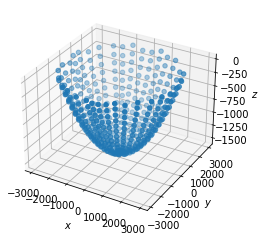

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas

df = pandas.read_csv('dish_zenith.txt', sep=' ', names = ['x', 'y', 'z'])

fig = plt.figure().gca(projection='3d')
fig.scatter(df['x'], df['y'], df['z']);
fig.set_xlabel('$x$');
fig.set_ylabel('$y$');
fig.set_zlabel('$z$');

It does look like a paraboloid, which is expected!

### b)

[A, B, C, D] :: [ 1.66704455e-04  4.53599028e-04 -1.94115589e-02 -1.51231182e+03] 

[a, x_0, y_0, z_0] :: [0.0001667044547740137, -1.360488622197982, 58.221476081578665, -1512.8772100367887] 

RMS error :: 3.7683386487847375 <- Pretty good!
z range: 1491.917
z std: 447.09690540338494


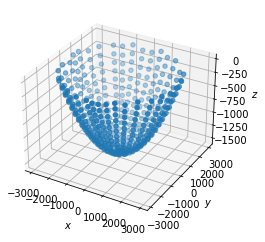

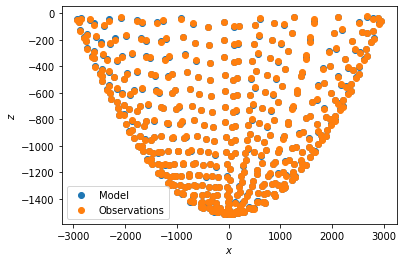

In [3]:
import numpy as np

# Build matrix A
matA = np.ones((len(df), 4)) # 4 parameters, A B C D

matA[:, 0] = df['x']**2 + df['y']**2
matA[:, 1] = df['x']
matA[:, 2] = df['y']

# Perform least-squares fitting
lhs = matA.T@matA
rhs = matA.T@df['z']

m = np.linalg.inv(lhs)@rhs

pred = matA@m

# Print optimal parameters
print("[A, B, C, D] ::", m, "\n")

# Find original parameters
a = m[0]
x_0 = m[1] / (-2.0 * a)
y_0 = m[2] / (-2.0 * a)
z_0 = m[3] - a * x_0 ** 2 - a * y_0 ** 2

print("[a, x_0, y_0, z_0] ::", [a, x_0, y_0, z_0], "\n")

# Plot
fig = plt.figure().gca(projection='3d')
fig.scatter(df['x'], df['y'], pred);
fig.set_xlabel('$x$');
fig.set_ylabel('$y$');
fig.set_zlabel('$z$');

# Error with data
print("RMS error ::", np.std(pred - df['z']), "<- Pretty good!")
print("z range:", np.ptp(df['z']))
print("z std:", np.std(df['z']))

# Compare data graphically
plt.figure();
plt.scatter(df['x'], pred);
plt.scatter(df['x'], df['z']);
plt.xlabel('$x$')
plt.ylabel('$z$')
plt.legend(['Model', 'Observations']);

### c)

In [73]:
# Compute noise
n = np.std(df['z'] - pred) ** 2
matNinv = np.eye(len(df))/n

lhs = matA.T@matNinv@matA
errs = np.sqrt(np.diag(np.linalg.inv(lhs)))

# Print uncertainty in a (or, equivalently, A)
print("Uncertainty in a ::", errs[0])

Uncertainty in a :: 6.451899757263459e-08


Comparing
\begin{align}
z &= a\big( (x - x_0)^2 + (y - y_0)^2 \big) + z_0
\end{align}

with
\begin{align}
y &= x^2/4f
\end{align}

we notice that the latter could be written as
\begin{align}
z &= (x - x_0)^2/4f + z_0
\end{align}

for $y \rightarrow z, x_0 = z_0 = 0$. Hence, by inspection, we notice that $a = 1/4f$ or $f = 1/4a$

In [86]:
# Focal length
f = 1/(4 * a)
print("Focal length :: %.4f m" % (f/1e3), "<- Really close to 1.5m!")

Focal length :: 1.4997 m <- Really close to 1.5m!


The uncertainty of the focal length is
\begin{align}
\delta f &= \Big| \frac{df(a)}{da} \Big|\ \delta a\\
&= \Big| -\frac{1}{4 a^2} \Big|\ \delta a\\
&= \frac{\delta a}{4 a^2}
\end{align}

In [102]:
# Uncertainty in focal length
deltaf = errs[0] / (4 * a**2)
print("Uncertainty in focal length :: %.4f mm" % deltaf)
print("=> Focal length :: %.4f (± %.4f) m" % (f/1e3, deltaf/1e3))

Uncertainty in focal length :: 0.5804 mm
=> Focal length :: 1.4997 (± 0.0006) m


This is great! The expected value of 1.5 m fits in our error bars!

### d)
Here, we basically redo the parts a) and b) with an additional parameter, $\theta$. 

First, we let
\begin{equation}
\begin{pmatrix}x' \\ y'\end{pmatrix} = \begin{pmatrix} \cos \theta & - \sin \theta\\ \sin \theta & \cos \theta \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix}
\end{equation}

Then, the dish equation is
\begin{align}
z = a(x' - x_0)^2 + b(y' - y_0)^2 + z_0
\end{align}

We can then replace $x'$ and $y'$ with the expressions in terms of $x$ and $y$. Letting $c_\theta \equiv \cos \theta, s_\theta \equiv \sin \theta$, we get
\begin{align}
z = Ax^2 + By^2 + Cxy + Dx + Ey + F
\end{align}

where
\begin{align}
A &= a c_\theta^2 + b s_\theta^2\\
B &= a s_\theta^2 + b c_\theta^2\\
C &= 2 b c_\theta s_\theta - 2 a c_\theta s_\theta\\
D &= -2 a x_0 c_\theta - 2 b y_0 s_\theta\\
E &= 2 a x_0 s_\theta - 2 b y_0 c_\theta\\
F &= a x_0^2 + b y_0^2 + z_0
\end{align}

Conversion in the other direction is a bit tedious. First, let
\begin{align}
\alpha &= 2 a (s_\theta - c_\theta)\\
\beta &= -2 b (s_\theta + c_\theta)\\
\gamma &= -2 a (s_\theta + c_\theta)\\
\Delta &= -2 b (s_\theta - c_\theta)
\end{align}

Then, in this order, the conversion can be done using
\begin{align}
\theta &= \frac{1}{2} \tan^{-1} \big( \frac{C}{B - A} \big)\\
a &= \frac{1}{2} \Big( A + B + \frac{A - B}{\cos(2 \theta)} \Big)\\
b &= A + B - a\\
y_0 &= \frac{\frac{\gamma}{\alpha}(D + E) - (D - E)}{\frac{\gamma}{\alpha} \beta - \Delta}\\
x_0 &= \frac{\frac{\Delta}{\beta}(D + E) - (D - E)}{\frac{\alpha}{\beta} \Delta - \gamma}\\
z_0 &= F - a x_0^2 - b y_0^2
\end{align}

[A, B, C, D, E, F] :: [ 1.66414734e-04  1.67074644e-04  1.92159479e-06  4.19322347e-04
 -1.93581475e-02 -1.51238281e+03] 

[a, b, theta, x_0, y_0, z_0] :: [0.00016572881384889967, 0.00016776056382357307, 0.6199986135965696, -34.96380620419951, 46.23122948847201, -1512.9439680659113] 

RMS error :: 1.6789523553929824 <- Pretty good! (better!)
z range: 1491.917
z std: 447.09690540338494


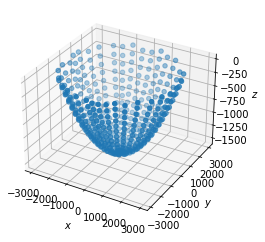

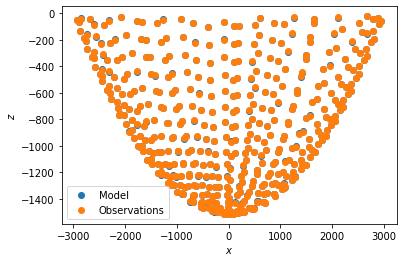

In [131]:
# Build matrix A
matA = np.ones((len(df), 6)) # 6 parameters, A B C D E F

matA[:, 0] = df['x']**2
matA[:, 1] = df['y']**2
matA[:, 2] = df['x'] * df['y']
matA[:, 3] = df['x']
matA[:, 4] = df['y']

# Perform least-squares fitting
lhs = matA.T@matA
rhs = matA.T@df['z']

m = np.linalg.inv(lhs)@rhs

pred = matA@m

# Print optimal parameters
print("[A, B, C, D, E, F] ::", m, "\n")

# Find original parameters
A, B, C, D, E, F = m

theta = 0.5 * np.arctan2(C, (B - A))

a = 0.5 * (A + B + (A - B)/(np.cos(2 * theta)))

b = A + B - a

st = np.sin(theta)
ct = np.cos(theta)

alpha = 2 * a * (st - ct)
beta = - 2 * b * (st + ct)
gamma = - 2 * a * (st + ct)
delta = - 2 * b * (st - ct)

y_0 = (gamma * (D + E) / alpha - (D - E))/(gamma * beta / alpha - delta)

x_0 = (delta * (D + E) / beta - (D - E))/(alpha * delta / beta - gamma)

z_0 = F - a * x_0**2 - b * y_0**2

print("[a, b, theta, x_0, y_0, z_0] ::", [a, b, theta, x_0, y_0, z_0], "\n")

# Plot
fig = plt.figure().gca(projection='3d')
fig.scatter(df['x'], df['y'], pred);
fig.set_xlabel('$x$');
fig.set_ylabel('$y$');
fig.set_zlabel('$z$');

# Error with data
print("RMS error ::", np.std(pred - df['z']), "<- Pretty good! (better!)")
print("z range:", np.ptp(df['z']))
print("z std:", np.std(df['z']))

# Compare data graphically
plt.figure();
plt.scatter(df['x'], pred);
plt.scatter(df['x'], df['z']);
plt.xlabel('$x$')
plt.ylabel('$z$')
plt.legend(['Model', 'Observations']);

In [140]:
# Angle
print("Angle theta ::", (theta * 180 / np.pi), "<- This is pretty large!\n")

# Focal lengths
fx = 1 / (4 * a)
fy = 1 / (4 * b)

print("Focal length fx ::", fx/1e3, "m")
print("Focal length fy ::", fy/1e3, "m\n")

# Difference in focal lengths
print("Difference in focal length ::", np.abs(fx - fy), "mm")
print("or a percentage difference of ::", (np.abs(fx - fy) / np.mean([fx, fy]) / 100), "%")

Angle theta :: 35.523303863045776 <- This is pretty large!

Focal length fx :: 1.5084884408086883 m
Focal length fy :: 1.4902191212406437 m

Difference in focal length :: 18.269319568044466 mm
or a percentage difference of :: 0.00012184795742842708 %


Given the very small difference in focal length, the dish is indeed approximately round!

## Problem 2

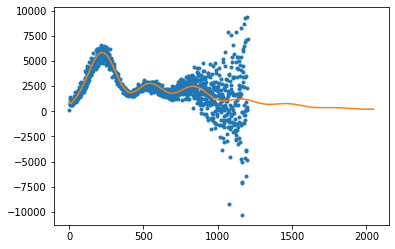

In [4]:
%reset -f
import camb
import matplotlib.pyplot as plt
import numpy as np
import pandas

def get_spectrum(pars, lmax = 2000):
    #print('pars are ',pars)
    H0, ombh2, omch2, tau, As, ns = pars

    pars = camb.CAMBparams()
    pars.set_cosmology(H0 = H0, ombh2 = ombh2, omch2 = omch2, mnu = 0.06, omk = 0,tau = tau)
    pars.InitPower.set_params(As = As,ns = ns,r = 0)
    pars.set_for_lmax(lmax, lens_potential_accuracy = 0)
    
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    cmb = powers['total']
    tt = cmb[2:,0] # Returning from quadrupole

    return tt

pars = np.asarray([65, 0.02, 0.1, 0.05, 2e-9, 0.96])
wmap = np.loadtxt('wmap_tt_spectrum_9yr_v5.txt')

#plt.errorbar(wmap[:,0],wmap[:,1],wmap[:,2],fmt='*')
plt.plot(wmap[:,0],wmap[:,1],'.');

cmb = get_spectrum(pars)
plt.plot(cmb);

### 2)

In [5]:
# Compute chisq
y_true = wmap[:,1]

def chisq(y, y_true, sig):
    return np.sum((y - y_true)**2 / sig**2)

print("chisq ::", chisq(cmb[:len(y_true)], y_true, wmap[:,2]), "<- around 1588, good! :)")

chisq :: 1588.2376465826746 <- around 1588, good! :)


### 3)
We start by writing a Newton's method/Levenberg-Marquardt minimizer with optical depth at 0.05.

In [6]:
def num_deriv(x, fun, pars, dpar):
    """
    Calculate the numerical derivatives of a function
    with respect to its parameters.
    """
    derivs = np.zeros([len(x), len(pars)])
    for i in range(len(pars)):
        pars2 = pars.copy()

        # Step of delta
        pars2[i] = pars[i] + dpar[i]
        f_right = fun(pars2)[:len(x)]
        pars2[i] = pars[i] - dpar[i]
        f_left = fun(pars2)[:len(x)]
        derivs[:,i] = (f_right - f_left) / (2 * dpar[i])
 
    return derivs

As a verification we plot the function and its derivative with respect to $n_s$, for a fixed x.

ns :: 0.100000 | f(ns) = 11062.335943 | df/dns = -18304.370195
ns :: 0.595000 | f(ns) = 4945.125820 | df/dns = -7887.911989
ns :: 1.090000 | f(ns) = 2289.418063 | df/dns = -3460.943977
ns :: 1.585000 | f(ns) = 1113.532601 | df/dns = -1551.682589
ns :: 2.080000 | f(ns) = 580.969196 | df/dns = -712.059570
ns :: 2.575000 | f(ns) = 334.416041 | df/dns = -332.623271
ns :: 3.070000 | f(ns) = 219.469650 | df/dns = -152.777974
ns :: 3.565000 | f(ns) = 169.607995 | df/dns = -56.835978
ns :: 4.060000 | f(ns) = 159.123549 | df/dns = 13.884872
ns :: 4.555000 | f(ns) = 185.631409 | df/dns = 97.453129
ns :: 5.050000 | f(ns) = 257.769930 | df/dns = 189.566566
ns :: 5.545000 | f(ns) = 358.146090 | df/dns = 193.922859
ns :: 6.040000 | f(ns) = 436.121303 | df/dns = 123.218869
ns :: 6.535000 | f(ns) = 495.147918 | df/dns = 134.006391
ns :: 7.030000 | f(ns) = 576.962985 | df/dns = 190.093465
ns :: 7.525000 | f(ns) = 661.911048 | df/dns = 118.929680


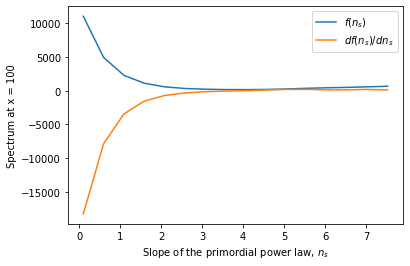

In [19]:
# Arrays use to hold f and df/dt values
f = []
df_dns = []
ns_arr = []

# Measure at fixed x
fixed_x = 100

# Set up
ns = 0.96
pars = np.asarray([65, 0.02, 0.1, 0.05, 2e-9, ns])
dns = ns * 1e-3

# Vary optical length and compute f and df/dns
for ns in np.linspace(0.1, 10.0, 21):
    # Set parameters
    pars = np.asarray([65, 0.02, 0.1, 0.05, 2e-9, ns])
    
    # Compute spectrum
    try:
        spectrum_at_x = get_spectrum(pars)[fixed_x]

        # Compute derivative
        pars2 = pars.copy()
        pars2[-1] = ns + dns
        f_right = get_spectrum(pars2)[fixed_x]
        pars2[-1] = ns - dns
        f_left = get_spectrum(pars2)[fixed_x]

        # Add to arrays
        f.append(spectrum_at_x)
        df_dns.append((f_right - f_left) / (2 * dns))
        ns_arr.append(ns)
    except:
        continue
        
    print("ns :: %f | f(ns) = %f | df/dns = %f" % (ns, f[-1], df_dns[-1]))
    
# Plot
plt.clf()
plt.plot(ns_arr, f)
plt.plot(ns_arr, df_dns)
plt.xlabel(r'Slope of the primordial power law, $n_s$')
plt.ylabel(r'Spectrum at x = %d' % fixed_x)
plt.legend([r"$f(n_s)$", r"$df(n_s)/dn_s$"])
plt.show()

Note that it looks like the derivative is correct. Also, from step to step, the derivative value gives a hint on whether the next function value will be bigger or smaller than the current function value. First define function for doing Markov's chain.

In [281]:
def newton_lm(pars, func):
    # Define parameters
    x = wmap[:,0]
    sig = wmap[:,2]
    Ninv = np.eye(len(x)) / sig**2
    dpar = pars * 1e-3 # Used for computing derivatives

    # Get initial model information
    model = func(pars)[:len(x)]
    chisq_tol = 1e-6
    chisq_arr = [chisq(model, y_true, sig)]

    # Set up variables for looping
    lm_lambda = 0
    lm_lambda_max = 1e6
    recompute_derivs = True # To speed up

    # Infinite loop that breaks once chisq converges
    while True:
        # Make step
        if recompute_derivs:
            derivs = num_deriv(x, func, pars, dpar)
        resid = y_true - model
        lhs = derivs.T@Ninv@derivs + lm_lambda * np.eye(derivs.shape[1])
        rhs = derivs.T@Ninv@resid
        lhs_inv = np.linalg.inv(lhs)
        step = lhs_inv@rhs

        pars += step

        # Recompute model and get error
        model = func(pars)[:len(x)]
        chisq_val = chisq(model, y_true, sig)

        # Change Lambda parameter
        if chisq_val < chisq_arr[-1]:
            # Improvement
            recompute_derivs = True
            opt_params = pars.copy()

            if lm_lambda < 0.5:
                lm_lambda = 0
            else:
                lm_lambda /= np.sqrt(2)
            print("[+] New lambda ::", lm_lambda)
        else:
            # Worse
            recompute_derivs = False

            if lm_lambda == 0:
                lm_lambda = 2
            else:
                lm_lambda *= 2

            print("[-] New lambda ::", lm_lambda)

            # Revert changes
            pars -= step

            # If lambda too large, quit looping
            if lm_lambda > lm_lambda_max:
                break

            # Prevent adding bad params to chain 
            continue 

        # Print new errors if parameters change is accepted
        chisq_arr.append(chisq_val)

        print("Parameters ::", pars)
        print("\tchisq ::", chisq_val)

        # Break if change in chisq is less than chisq_tol
        if chisq_arr[-2] - chisq_arr[-1] < chisq_tol:
            break
            
    return opt_params, chisq_arr

def plot_chisq_arr(chisq_arr):
    # Plot chisq evolution
    plt.plot(chisq_arr)
    plt.xlabel('Step')
    plt.ylabel(r'$\chi^2$')
    plt.show()
    
    print("Final chisq value ::", chisq_arr[-1])

Next fitting process.

In [283]:
def get_spectrum_no_tau(params):
    return get_spectrum([params[0], params[1], params[2], 0.05, params[3], params[4]])

initial_pars = np.asarray([65, 0.02, 0.1, 0.05, 2e-9, 0.96])

pars = initial_pars.copy(); pars = np.delete(pars, 3)
opt_params, chisq_arr = newton_lm(pars, get_spectrum_no_tau)

[+] New lambda :: 0
Parameters :: [6.73355337e+01 2.24571776e-02 1.16215420e-01 2.06920185e-09
 9.66439836e-01]
	chisq :: 1234.8179321715684
[+] New lambda :: 0
Parameters :: [6.92806269e+01 2.24928171e-02 1.14000448e-01 2.04318572e-09
 9.69723952e-01]
	chisq :: 1227.9368878143057
[+] New lambda :: 0
Parameters :: [6.93409947e+01 2.24930296e-02 1.13884051e-01 2.04233702e-09
 9.69822160e-01]
	chisq :: 1227.9356707750703
[+] New lambda :: 0
Parameters :: [6.93302361e+01 2.24916318e-02 1.13905445e-01 2.04246176e-09
 9.69779467e-01]
	chisq :: 1227.9356346857817
[+] New lambda :: 0
Parameters :: [6.93291188e+01 2.24918581e-02 1.13909640e-01 2.04249669e-09
 9.69780605e-01]
	chisq :: 1227.9356343990871


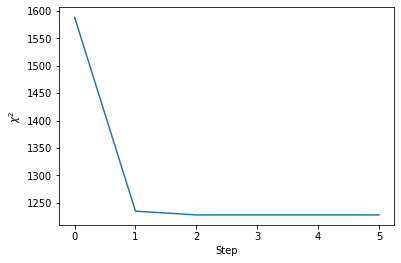

Final chisq value :: 1227.9356343990871
[H0, ombh2, omch2, As, ns] :: [6.93291188e+01 2.24918581e-02 1.13909640e-01 2.04249669e-09
 9.69780605e-01]


In [284]:
# Plot chisq evolution
plot_chisq_arr(chisq_arr)

print("[H0, ombh2, omch2, As, ns] ::", opt_params)

Now we keep all parameters except $\tau$ constant.

In [285]:
def get_spectrum_only_tau(tau):
    return get_spectrum([opt_params[0], opt_params[1], opt_params[2], tau[0], opt_params[3], opt_params[4]])

pars = np.array([0.05]) # Only tau
opt_params_only_tau, chisq_arr = newton_lm(pars, get_spectrum_only_tau)

[+] New lambda :: 0
Parameters :: [0.0499982]
	chisq :: 1227.9356334338445


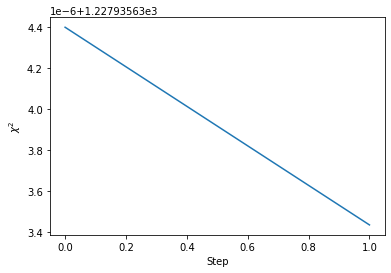

Final chisq value :: 1227.9356334338445
[H0, ombh2, omch2, tau, As, ns] :: [6.93291188e+01 2.24918581e-02 1.13909640e-01 2.04249669e-09
 9.69780605e-01]


In [286]:
# Plot chisq evolution
plot_chisq_arr(chisq_arr)

opt_opt_params = np.array([opt_params[0], opt_params[1], opt_params[2], opt_params_only_tau[0], opt_params[3], opt_params[4]])
print("[H0, ombh2, omch2, tau, As, ns] ::", opt_params)

Notice that only changing $\tau$ doesn't allow for great flexibility and much better accuracy. The result of running Newton's method with tau fixed optimized the problem in a 5-dimensional space, and then redefining the function in a one-dimensional space ($\tau$) does not allow for great flexibility; the value of $\tau$ seems stuck. Thus, as a final step, we rerun Newton's method, but for all parameters, starting at our initial point.

In [287]:
opt_params_all, chisq_arr = newton_lm(initial_pars.copy(), get_spectrum)

[+] New lambda :: 0
Parameters :: [6.71397077e+01 2.24140765e-02 1.16535956e-01 3.90304850e-02
 2.02657663e-09 9.64861796e-01]
	chisq :: 1235.5556443952628
[+] New lambda :: 0
Parameters :: [6.87817329e+01 2.23745610e-02 1.14860603e-01 1.84262365e-02
 1.91852883e-09 9.65713361e-01]
	chisq :: 1227.9996567046087
[-] New lambda :: 2
[-] New lambda :: 4
[-] New lambda :: 8
[-] New lambda :: 16
[-] New lambda :: 32
[-] New lambda :: 64
[-] New lambda :: 128
[-] New lambda :: 256
[-] New lambda :: 512
[-] New lambda :: 1024
[-] New lambda :: 2048
[-] New lambda :: 4096
[-] New lambda :: 8192
[-] New lambda :: 16384
[-] New lambda :: 32768
[-] New lambda :: 65536
[-] New lambda :: 131072
[-] New lambda :: 262144
[-] New lambda :: 524288
[-] New lambda :: 1048576


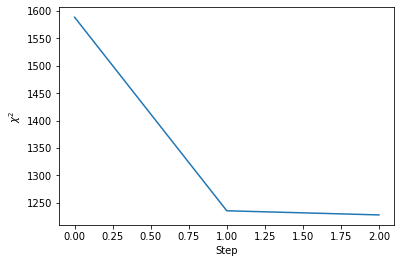

Final chisq value :: 1227.9996567046087
[H0, ombh2, omch2, tau, As, ns] :: [6.87817329e+01 2.23745610e-02 1.14860603e-01 1.84262365e-02
 1.91852883e-09 9.65713361e-01]


In [288]:
# Plot chisq evolution
plot_chisq_arr(chisq_arr)

print("[H0, ombh2, omch2, tau, As, ns] ::", opt_params_all)

We see no improvement compared to the 2-step approach: fitting the 5 parameters then tau.

### 4)
Now, we want to do a Markov-chain Monte Carlo fit for the 6 parameters, including $\tau$.

We start by defining the function we'll be using.

In [384]:
def our_chisq(data, pars):
    #we need a function that calculates chi^2 for us for the MCMC
    #routine to call
    x = data[0]
    y = data[1]
    noise = data[2]
    model = get_spectrum(pars)[:len(x)]
    chisq = np.sum((y - model)**2 / noise**2)
    return chisq

def run_mcmc(pars, data, sample_mat, chifun, scale=1.0, T=1.0, nstep=5000):
    npar = len(pars)
    chain = np.zeros([nstep,npar])
    chivec = np.zeros(nstep)
    
    chi_cur = chifun(data,pars)
    chi_trial = 0
    for i in range(nstep):
        pars_trial = pars + np.dot(sample_mat, np.random.randn(sample_mat.shape[0]))
        
        if pars_trial[3] < 0:
            while pars_trial[3] < 0:
                # If optical depth is negative, reject and retry step
                try:
                    pars_trial = pars + np.dot(sample_mat, np.random.randn(sample_mat.shape[0])) * scale
                    chi_trial = chifun(data, pars_trial)
                except:
                    # Error with parameters, retry
                    continue
        else:
            chi_trial = chifun(data, pars_trial)
            
        #print("Trying following parameters ::", pars_trial)
        #print("Chisq ::", chi_trial)
            
        #we now have chi^2 at our current location
        #and chi^2 in our trial location. decide if we take the step
        accept_prob = np.exp(-0.5 * (chi_trial - chi_cur) / T)
        if np.random.rand(1) < accept_prob: #accept the step with appropriate probability
            #print("\tGood! Taking step.")
            pars = pars_trial
            chi_cur = chi_trial
        chain[i,:] = pars
        chivec[i] = chi_cur
        
    return chain, chivec

Then, we extract the covariance matrix and use it to initialize our error estimates. Next, we run our MCMC routine.

In [322]:
# Compute covariance matrix at boundary of final round
pars = opt_params_all.copy()
dpar = pars * 1e-3

derivs = num_deriv(x, get_spectrum, pars, dpar)

model = get_spectrum(pars)[:len(x)]

resid = y_true - model
curv = (derivs.T@Ninv@derivs)

sample_mat = np.linalg.cholesky(np.linalg.inv(curv)) # Sampling matrix

In [369]:
# Start with initial parameters
pars = initial_pars.copy()
data = [wmap[:,0], wmap[:,1], wmap[:,2]] # x, y, noise

# Run MCMC
chain, chivec = run_mcmc(pars, data, sample_mat, our_chisq, scale = 0.2, T = 4, nstep = 5000)

Trying following parameters :: [7.12870882e+01 2.06666677e-02 8.72595072e-02 2.71112135e-01
 2.77961884e-09 9.95217544e-01]
Chisq :: 1373.9093032994797
	Good! Taking step.
Trying following parameters :: [7.01625824e+01 1.96915127e-02 8.25061986e-02 1.88295748e-01
 2.40414316e-09 9.70852151e-01]
Chisq :: 1627.8757126596379
Trying following parameters :: [7.59467228e+01 2.05991565e-02 7.56267450e-02 3.13114460e-01
 2.86657592e-09 1.00169643e+00]
Chisq :: 1428.2886399661666
Trying following parameters :: [7.05022605e+01 1.99948346e-02 8.49186859e-02 2.24955314e-01
 2.57001848e-09 9.76336604e-01]
Chisq :: 1448.4079866487202
Trying following parameters :: [6.96649610e+01 2.06163678e-02 9.33048325e-02 2.22201614e-01
 2.63047541e-09 9.80855285e-01]
Chisq :: 1324.6776847889596
	Good! Taking step.
Trying following parameters :: [6.84834486e+01 2.03757778e-02 9.53138414e-02 2.30709554e-01
 2.67773896e-09 9.81809897e-01]
Chisq :: 1329.3904904902702
	Good! Taking step.
Trying following parameters 

Trying following parameters :: [6.88401655e+01 2.35697443e-02 1.12942451e-01 4.18739174e-01
 3.60061629e-09 1.02097817e+00]
Chisq :: 2998.2928537938506
Trying following parameters :: [7.06713968e+01 2.36587144e-02 1.07583921e-01 4.10811936e-01
 3.52615372e-09 1.03280515e+00]
Chisq :: 2828.22638467475
Trying following parameters :: [6.53837976e+01 2.20960643e-02 1.13690210e-01 2.28982174e-01
 2.81539177e-09 9.72540059e-01]
Chisq :: 1309.1508391681791
Trying following parameters :: [6.63772498e+01 2.15725932e-02 1.10193432e-01 1.66960143e-01
 2.55858061e-09 9.75293541e-01]
Chisq :: 1267.215625007094
	Good! Taking step.
Trying following parameters :: [7.26852598e+01 2.34988962e-02 1.02488941e-01 3.69538314e-01
 3.32445491e-09 1.01770670e+00]
Chisq :: 2075.9324881868215
Trying following parameters :: [6.78437405e+01 2.18054991e-02 1.06084182e-01 4.06776954e-01
 3.45761745e-09 9.81922356e-01]
Chisq :: 2511.7008695073764
Trying following parameters :: [6.70097775e+01 2.15938957e-02 1.0901423

Trying following parameters :: [7.42586314e+01 2.23062398e-02 1.00462535e-01 2.06215215e-01
 2.64949930e-09 9.89182654e-01]
Chisq :: 1238.431191647138
	Good! Taking step.
Trying following parameters :: [7.72018024e+01 2.26697167e-02 9.60055342e-02 2.60224541e-01
 2.83325949e-09 9.97282841e-01]
Chisq :: 1296.7898075590344
Trying following parameters :: [7.37731908e+01 2.22446701e-02 1.01940313e-01 2.23840561e-01
 2.72708204e-09 9.88399802e-01]
Chisq :: 1253.843889508555
Trying following parameters :: [7.29113272e+01 2.22611675e-02 1.04335666e-01 2.51066786e-01
 2.84605346e-09 9.74229073e-01]
Chisq :: 1306.6943212082383
Trying following parameters :: [7.30897978e+01 2.20452858e-02 1.00373124e-01 1.88249635e-01
 2.56404277e-09 9.81998489e-01]
Chisq :: 1242.4949535812125
	Good! Taking step.
Trying following parameters :: [7.59153714e+01 2.26455257e-02 9.61831180e-02 2.92553159e-01
 2.95449043e-09 1.00412667e+00]
Chisq :: 1421.643415781929
Trying following parameters :: [7.49454911e+01 2.24

Trying following parameters :: [8.08309141e+01 2.29239300e-02 8.06359983e-02 1.74627026e-01
 2.42218701e-09 1.01843027e+00]
Chisq :: 1490.5450872122574
Trying following parameters :: [7.77516426e+01 2.35134730e-02 9.38236307e-02 1.49415672e-01
 2.41895677e-09 1.02024446e+00]
Chisq :: 1320.6990799440798
Trying following parameters :: [7.64812948e+01 2.23448445e-02 9.03341060e-02 2.49189463e-01
 2.76337103e-09 9.94839675e-01]
Chisq :: 1261.1213816637628
Trying following parameters :: [7.42569103e+01 2.32918180e-02 1.02071249e-01 1.53888722e-01
 2.49731292e-09 1.00583357e+00]
Chisq :: 1285.8346229726394
Trying following parameters :: [7.98983031e+01 2.36478169e-02 8.87516897e-02 3.27341901e-01
 3.08283884e-09 1.02769855e+00]
Chisq :: 1457.1994263333427
Trying following parameters :: [8.04915741e+01 2.37833231e-02 8.40065874e-02 2.08893722e-01
 2.60413658e-09 1.04040807e+00]
Chisq :: 1330.2949573367189
Trying following parameters :: [7.98948724e+01 2.32130110e-02 8.49892522e-02 2.05155503e

Trying following parameters :: [8.19974507e+01 2.48345896e-02 9.08459555e-02 2.89712898e-01
 2.98694592e-09 1.05974343e+00]
Chisq :: 1354.4072879586695
Trying following parameters :: [8.02970533e+01 2.45718133e-02 9.41105958e-02 2.33107457e-01
 2.77868198e-09 1.04685459e+00]
Chisq :: 1241.203095144147
	Good! Taking step.
Trying following parameters :: [7.85973440e+01 2.44251014e-02 9.56841778e-02 1.89024493e-01
 2.61460577e-09 1.03680772e+00]
Chisq :: 1252.1322781019448
	Good! Taking step.
Trying following parameters :: [8.00880397e+01 2.53683042e-02 9.76756086e-02 1.22921956e-01
 2.40565119e-09 1.06041368e+00]
Chisq :: 1372.8302924839845
Trying following parameters :: [7.83737768e+01 2.44046826e-02 9.53085606e-02 3.50346910e-02
 2.01485824e-09 1.02823977e+00]
Chisq :: 1590.7002133741098
Trying following parameters :: [7.97174720e+01 2.40359135e-02 9.08343169e-02 2.53643183e-01
 2.81058824e-09 1.02694636e+00]
Chisq :: 1253.567196648454
	Good! Taking step.
Trying following parameters ::

Trying following parameters :: [8.19980742e+01 2.45917192e-02 9.00433190e-02 3.92152607e-01
 3.34963836e-09 1.04245958e+00]
Chisq :: 2093.5976324525336
Trying following parameters :: [7.82470237e+01 2.33000676e-02 9.45332774e-02 6.54749168e-02
 2.11597341e-09 1.01259290e+00]
Chisq :: 1565.8958259444644
Trying following parameters :: [7.84995949e+01 2.35269496e-02 9.27619095e-02 2.34043326e-01
 2.73622282e-09 1.02037572e+00]
Chisq :: 1240.7557374820299
	Good! Taking step.
Trying following parameters :: [7.37894010e+01 2.21586301e-02 9.99738208e-02 8.26577190e-02
 2.16910001e-09 9.70951488e-01]
Chisq :: 1462.8468563853594
Trying following parameters :: [8.52095991e+01 2.43811183e-02 7.98475784e-02 3.24498035e-01
 3.03678881e-09 1.05864680e+00]
Chisq :: 1368.9097886281568
Trying following parameters :: [8.12246837e+01 2.40095339e-02 8.94161268e-02 2.00663010e-01
 2.59167912e-09 1.02621205e+00]
Chisq :: 1258.4017779588683
Trying following parameters :: [7.90023623e+01 2.41215659e-02 9.4491

Trying following parameters :: [7.49528017e+01 2.35277136e-02 1.05350871e-01 1.98964599e-01
 2.69378939e-09 1.02340546e+00]
Chisq :: 1241.1082867131386
	Good! Taking step.
Trying following parameters :: [7.46398327e+01 2.33898902e-02 1.07944267e-01 2.41063079e-01
 2.87128303e-09 1.02872264e+00]
Chisq :: 1370.6758745177422
Trying following parameters :: [7.04377280e+01 2.32163681e-02 1.14091196e-01 2.17861244e-01
 2.81935109e-09 1.00553873e+00]
Chisq :: 1281.8026901417206
Trying following parameters :: [7.39151670e+01 2.34739104e-02 1.07904302e-01 1.68575979e-01
 2.58925449e-09 1.01810201e+00]
Chisq :: 1233.9710961633295
	Good! Taking step.
Trying following parameters :: [7.37318171e+01 2.33919247e-02 1.07782535e-01 1.63524440e-01
 2.56884249e-09 1.01761436e+00]
Chisq :: 1236.1744945702337
	Good! Taking step.
Trying following parameters :: [7.34341545e+01 2.33085261e-02 1.08610599e-01 1.41879960e-01
 2.49007387e-09 1.01414798e+00]
Chisq :: 1251.1381437261548
Trying following parameters 

Trying following parameters :: [7.91186255e+01 2.43601814e-02 1.00854082e-01 1.25162356e-01
 2.36028525e-09 1.02294191e+00]
Chisq :: 1265.8599591084583
Trying following parameters :: [7.90210797e+01 2.29925345e-02 9.63366675e-02 1.07130054e-01
 2.25695166e-09 1.02786735e+00]
Chisq :: 1319.3599767760154
Trying following parameters :: [7.58159397e+01 2.32481757e-02 1.03702604e-01 5.37851395e-02
 2.08884518e-09 1.00356837e+00]
Chisq :: 1344.4910393560153
Trying following parameters :: [7.97962041e+01 2.39035951e-02 9.64777170e-02 2.26112958e-01
 2.72193858e-09 1.03651973e+00]
Chisq :: 1278.1117457446508
Trying following parameters :: [7.43320507e+01 2.29025374e-02 1.04581983e-01 4.15347830e-02
 2.05151683e-09 1.01186484e+00]
Chisq :: 1353.6114269322677
Trying following parameters :: [7.67646334e+01 2.41225014e-02 1.05489812e-01 2.98698004e-01
 3.07105531e-09 1.03734644e+00]
Chisq :: 1696.5680861493383
Trying following parameters :: [8.28875996e+01 2.44553927e-02 9.21266722e-02 4.50529210e

Trying following parameters :: [7.43994677e+01 2.33414827e-02 1.02064609e-01 9.89235442e-02
 2.24926460e-09 1.01105787e+00]
Chisq :: 1296.3552279001833
Trying following parameters :: [7.39547741e+01 2.32228893e-02 1.03061715e-01 1.67852385e-01
 2.51473903e-09 1.00589313e+00]
Chisq :: 1230.7925325965966
	Good! Taking step.
Trying following parameters :: [7.43627554e+01 2.32859739e-02 1.04088581e-01 1.75335417e-01
 2.57425408e-09 1.01769969e+00]
Chisq :: 1233.2531281605093
	Good! Taking step.
Trying following parameters :: [6.92894365e+01 2.29113973e-02 1.17333508e-01 2.33935594e-02
 2.08856576e-09 9.91579341e-01]
Chisq :: 1439.312654787902
Trying following parameters :: [7.42880680e+01 2.31925027e-02 1.03890846e-01 1.85104035e-01
 2.60703603e-09 1.01702898e+00]
Chisq :: 1235.9820821969913
	Good! Taking step.
Trying following parameters :: [7.65053182e+01 2.37975266e-02 9.89430561e-02 3.75073017e-01
 3.32022732e-09 1.04093075e+00]
Chisq :: 2237.513336912917
Trying following parameters ::

Trying following parameters :: [7.26315828e+01 2.31678427e-02 1.16867764e-01 1.91149999e-01
 2.69859058e-09 9.89880447e-01]
Chisq :: 1302.9533976110097
Trying following parameters :: [7.46292996e+01 2.37050313e-02 1.12987971e-01 2.20008525e-01
 2.78499846e-09 1.00192804e+00]
Chisq :: 1372.0868297837474
Trying following parameters :: [7.42566170e+01 2.43326947e-02 1.17869670e-01 2.15169119e-01
 2.81996294e-09 1.01243626e+00]
Chisq :: 1390.5554490880606
Trying following parameters :: [7.79262254e+01 2.36753900e-02 1.06852481e-01 3.19702817e-01
 3.14825614e-09 1.01481368e+00]
Chisq :: 1886.3956842985988
Trying following parameters :: [7.08201317e+01 2.33109475e-02 1.23066073e-01 4.95742259e-02
 2.20951331e-09 9.90788246e-01]
Chisq :: 1328.9525043409153
Trying following parameters :: [7.32228547e+01 2.30363210e-02 1.13462196e-01 3.12318436e-01
 3.14149649e-09 9.93298918e-01]
Chisq :: 1895.5297841262905
Trying following parameters :: [6.88770398e+01 2.35072637e-02 1.27483712e-01 1.57504763e

Trying following parameters :: [6.93850115e+01 2.30993968e-02 1.18497797e-01 1.40155069e-01
 2.49691495e-09 9.69688622e-01]
Chisq :: 1240.238230570877
	Good! Taking step.
Trying following parameters :: [6.60260291e+01 2.27835599e-02 1.28472301e-01 1.24700971e-01
 2.50521068e-09 9.65296702e-01]
Chisq :: 1245.2241252881493
Trying following parameters :: [7.38966393e+01 2.37512949e-02 1.09022371e-01 2.11198066e-01
 2.71978619e-09 9.95096205e-01]
Chisq :: 1286.6443015046711
Trying following parameters :: [6.93346459e+01 2.30514917e-02 1.17322089e-01 1.06058320e-01
 2.33953307e-09 9.62180479e-01]
Chisq :: 1255.3983361158207
Trying following parameters :: [7.34518554e+01 2.37260302e-02 1.08907380e-01 1.90952482e-01
 2.63301371e-09 9.86513490e-01]
Chisq :: 1255.1741789641162
Trying following parameters :: [7.10819560e+01 2.33318552e-02 1.13572490e-01 3.00203103e-01
 3.10069717e-09 9.93040135e-01]
Chisq :: 1720.6887374520975
Trying following parameters :: [6.69720168e+01 2.29203209e-02 1.24800

Trying following parameters :: [7.49802918e+01 2.36497859e-02 1.03191372e-01 3.23270924e-01
 3.09794318e-09 1.00114361e+00]
Chisq :: 1817.4250604971476
Trying following parameters :: [7.37355427e+01 2.30342545e-02 1.05796234e-01 2.67604901e-01
 2.89614991e-09 9.79085735e-01]
Chisq :: 1443.0279796221766
Trying following parameters :: [7.31697941e+01 2.26504120e-02 1.08514440e-01 4.29845911e-02
 2.03401461e-09 9.76227147e-01]
Chisq :: 1285.9897956683396
Trying following parameters :: [6.56307623e+01 2.16253393e-02 1.21286298e-01 1.79201814e-01
 2.63062692e-09 9.47190679e-01]
Chisq :: 1276.2731423428932
Trying following parameters :: [7.19195064e+01 2.35136781e-02 1.11748273e-01 2.90503955e-01
 3.04007366e-09 9.92691376e-01]
Chisq :: 1656.652196503152
Trying following parameters :: [7.14360647e+01 2.25739418e-02 1.09857233e-01 1.19698428e-01
 2.33600998e-09 9.64357535e-01]
Chisq :: 1250.823932210863
Trying following parameters :: [7.38874423e+01 2.31573528e-02 1.04387754e-01 2.62567755e-0

Trying following parameters :: [7.22653245e+01 2.33931052e-02 1.14792797e-01 1.68049122e-01
 2.61488477e-09 1.00785666e+00]
Chisq :: 1246.9005461901718
	Good! Taking step.
Trying following parameters :: [7.33053740e+01 2.33994125e-02 1.12278700e-01 1.56003939e-01
 2.55342054e-09 1.01149745e+00]
Chisq :: 1240.4276884762653
	Good! Taking step.
Trying following parameters :: [7.19274563e+01 2.34489240e-02 1.15532368e-01 2.45215848e-01
 2.90440290e-09 1.00619107e+00]
Chisq :: 1472.5580751931902
Trying following parameters :: [7.62942308e+01 2.34126081e-02 1.02712968e-01 1.91176223e-01
 2.61999243e-09 1.01804282e+00]
Chisq :: 1241.2823274295802
	Good! Taking step.
Trying following parameters :: [7.71734280e+01 2.36203390e-02 1.00799986e-01 2.18910388e-01
 2.71535258e-09 1.02280014e+00]
Chisq :: 1270.558867966356
Trying following parameters :: [8.18189877e+01 2.42480702e-02 9.15458534e-02 2.66057965e-01
 2.86184306e-09 1.03921673e+00]
Chisq :: 1306.2006637294344
Trying following parameters :

Trying following parameters :: [7.20010746e+01 2.29173882e-02 1.11150574e-01 1.30889264e-01
 2.42184701e-09 1.00021464e+00]
Chisq :: 1235.9569700302136
Trying following parameters :: [7.43400516e+01 2.34597242e-02 1.07050641e-01 2.02630328e-01
 2.68013901e-09 9.99471960e-01]
Chisq :: 1256.4085522139885
Trying following parameters :: [7.88194887e+01 2.40153258e-02 9.59243012e-02 1.57985269e-01
 2.45661887e-09 1.03026673e+00]
Chisq :: 1251.1939569827287
Trying following parameters :: [7.54144908e+01 2.33081244e-02 1.02289476e-01 1.96479828e-01
 2.62293200e-09 9.93504484e-01]
Chisq :: 1236.280981180685
Trying following parameters :: [7.97088013e+01 2.39642225e-02 9.33153924e-02 4.24129421e-01
 3.45187794e-09 1.02629810e+00]
Chisq :: 2695.0393877658685
Trying following parameters :: [7.88920608e+01 2.39506583e-02 9.81699073e-02 9.67020531e-02
 2.21319636e-09 1.01145915e+00]
Chisq :: 1303.022787119156
Trying following parameters :: [7.03147075e+01 2.33836789e-02 1.15864577e-01 2.56327879e-0

Trying following parameters :: [7.15712963e+01 2.31436293e-02 1.14442048e-01 3.68439815e-01
 3.33428592e-09 9.76922434e-01]
Chisq :: 2540.7975129402867
Trying following parameters :: [6.97318207e+01 2.23011615e-02 1.13163441e-01 1.74862939e-01
 2.56740913e-09 9.58730115e-01]
Chisq :: 1250.8011516967997
Trying following parameters :: [6.37237206e+01 2.19215419e-02 1.28772510e-01 1.33428447e-01
 2.51015861e-09 9.44012051e-01]
Chisq :: 1248.677517759404
	Good! Taking step.
Trying following parameters :: [6.70787321e+01 2.24346986e-02 1.21850826e-01 2.71305457e-01
 3.00850886e-09 9.68505662e-01]
Chisq :: 1663.1716503201324
Trying following parameters :: [6.45549193e+01 2.22534180e-02 1.25180424e-01 2.04976142e-01
 2.75357694e-09 9.53768589e-01]
Chisq :: 1369.5209136825101
Trying following parameters :: [6.38299451e+01 2.20197689e-02 1.28741196e-01 1.49762684e-01
 2.57309832e-09 9.44698601e-01]
Chisq :: 1258.8003475965857
Trying following parameters :: [6.28166145e+01 2.19743099e-02 1.29692

Trying following parameters :: [7.37901578e+01 2.27521993e-02 1.06388227e-01 1.21530118e-01
 2.32829241e-09 9.96266438e-01]
Chisq :: 1235.9053482436416
	Good! Taking step.
Trying following parameters :: [7.41265674e+01 2.29381429e-02 1.09275194e-01 1.76278059e-01
 2.57353947e-09 1.00499943e+00]
Chisq :: 1273.214743454479
Trying following parameters :: [7.15523206e+01 2.19705225e-02 1.07405536e-01 2.10095146e-02
 1.93489496e-09 9.76566790e-01]
Chisq :: 1287.9182523300162
	Good! Taking step.
Trying following parameters :: [7.44329631e+01 2.22921232e-02 1.02595222e-01 2.15307186e-02
 1.91881639e-09 9.87079725e-01]
Chisq :: 1312.0757484591231
Trying following parameters :: [7.60271925e+01 2.25911088e-02 9.83854050e-02 1.64369123e-01
 2.43873477e-09 9.97993824e-01]
Chisq :: 1236.0478522426843
	Good! Taking step.
Trying following parameters :: [7.76557407e+01 2.26612637e-02 9.43962010e-02 8.82836665e-02
 2.10186457e-09 1.00421309e+00]
Chisq :: 1266.1653637085806
Trying following parameters :

Trying following parameters :: [7.11049953e+01 2.33178331e-02 1.14492065e-01 1.30177062e-01
 2.40772553e-09 9.94202140e-01]
Chisq :: 1237.0042089843812
	Good! Taking step.
Trying following parameters :: [7.41063488e+01 2.38880681e-02 1.09435263e-01 5.35603040e-01
 3.94240415e-09 1.01516915e+00]
Chisq :: 5898.841826563261
Trying following parameters :: [7.16612953e+01 2.34401429e-02 1.13264304e-01 1.35139231e-01
 2.42072302e-09 9.97931709e-01]
Chisq :: 1238.81530978262
	Good! Taking step.
Trying following parameters :: [7.14600202e+01 2.25428752e-02 1.12146433e-01 5.79172192e-02
 2.11698589e-09 9.89783448e-01]
Chisq :: 1256.1480354397004
Trying following parameters :: [6.85818721e+01 2.23959159e-02 1.17346113e-01 2.68706152e-01
 2.95277454e-09 9.85135485e-01]
Chisq :: 1697.060662075101
Trying following parameters :: [7.11237376e+01 2.31771777e-02 1.15628359e-01 4.96113205e-02
 2.09631187e-09 9.87239615e-01]
Chisq :: 1240.0188362013755
Trying following parameters :: [7.20927344e+01 2.341

Trying following parameters :: [6.87480561e+01 2.21744270e-02 1.12574282e-01 2.79859047e-02
 1.98091194e-09 9.83973206e-01]
Chisq :: 1250.730624721654
	Good! Taking step.
Trying following parameters :: [6.97846642e+01 2.22085315e-02 1.10405931e-01 3.83413680e-02
 2.00941288e-09 9.86073131e-01]
Chisq :: 1252.2118747406876
	Good! Taking step.
Trying following parameters :: [7.27828794e+01 2.26744050e-02 1.04481339e-01 1.52283182e-01
 2.40327625e-09 9.93877885e-01]
Chisq :: 1243.3977916559356
	Good! Taking step.
Trying following parameters :: [7.29892964e+01 2.26814095e-02 1.03960284e-01 1.36216810e-01
 2.33905191e-09 9.92676448e-01]
Chisq :: 1233.6866212366376
	Good! Taking step.
Trying following parameters :: [7.14906199e+01 2.30204024e-02 1.07846059e-01 2.74899347e-01
 2.90819130e-09 1.01124519e+00]
Chisq :: 1703.4198849947356
Trying following parameters :: [7.50621846e+01 2.29055357e-02 1.00527010e-01 1.25583348e-01
 2.28845827e-09 1.00668229e+00]
Chisq :: 1236.2927965662777
	Good! Ta

Trying following parameters :: [7.81112354e+01 2.30812070e-02 9.32360140e-02 5.72500986e-01
 3.96190773e-09 1.02214300e+00]
Chisq :: 6019.051550316846
Trying following parameters :: [8.07265069e+01 2.37187838e-02 9.06401591e-02 3.18220086e-01
 2.99265875e-09 1.02785904e+00]
Chisq :: 1650.5912283242023
Trying following parameters :: [7.24002451e+01 2.19811604e-02 1.04426019e-01 1.01955588e-01
 2.21183967e-09 9.76335108e-01]
Chisq :: 1245.4149603422693
	Good! Taking step.
Trying following parameters :: [7.24377513e+01 2.20825112e-02 1.04478209e-01 1.19626897e-01
 2.28256217e-09 9.78610796e-01]
Chisq :: 1237.608186500468
	Good! Taking step.
Trying following parameters :: [7.15932894e+01 2.17785742e-02 1.05953082e-01 2.73299201e-01
 2.87840967e-09 9.71973780e-01]
Chisq :: 1541.7906513156222
Trying following parameters :: [7.22215755e+01 2.19648103e-02 1.04874295e-01 1.39717456e-01
 2.36128617e-09 9.77520515e-01]
Chisq :: 1235.1041017265397
	Good! Taking step.
Trying following parameters ::

Trying following parameters :: [6.14855545e+01 2.17020088e-02 1.32678691e-01 1.85956208e-02
 2.05663803e-09 9.11925093e-01]
Chisq :: 1322.5159525767604
Trying following parameters :: [6.18158742e+01 2.19940132e-02 1.32618978e-01 6.76634762e-02
 2.25295389e-09 9.29066339e-01]
Chisq :: 1266.1363296672316
	Good! Taking step.
Trying following parameters :: [5.85654231e+01 2.14210251e-02 1.40345379e-01 3.89324467e-02
 2.20648997e-09 9.20866194e-01]
Chisq :: 1314.1330039854345
Trying following parameters :: [6.06965579e+01 2.17355507e-02 1.34495578e-01 3.90647353e-02
 2.15252703e-09 9.22512376e-01]
Chisq :: 1288.6267110006697
Trying following parameters :: [6.46855029e+01 2.23409788e-02 1.27115970e-01 7.12431089e-02
 2.22875810e-09 9.41544055e-01]
Chisq :: 1248.6493503163217
	Good! Taking step.
Trying following parameters :: [6.43245034e+01 2.23112601e-02 1.28033836e-01 8.94781794e-02
 2.30451810e-09 9.40840441e-01]
Chisq :: 1246.4501536510552
	Good! Taking step.
Trying following parameters 

Trying following parameters :: [7.04684244e+01 2.30631398e-02 1.17735124e-01 1.09922841e-01
 2.33888019e-09 9.65262586e-01]
Chisq :: 1243.3282904967914
	Good! Taking step.
Trying following parameters :: [6.86661027e+01 2.26676258e-02 1.20703515e-01 5.17033418e-02
 2.13090604e-09 9.55721983e-01]
Chisq :: 1262.6542168354126
Trying following parameters :: [6.84220704e+01 2.30012515e-02 1.24085558e-01 1.78992092e-01
 2.65159677e-09 9.70995855e-01]
Chisq :: 1338.776460060127
Trying following parameters :: [7.00030017e+01 2.30669032e-02 1.19173516e-01 1.10943466e-01
 2.35307211e-09 9.61488868e-01]
Chisq :: 1247.4446485044355
	Good! Taking step.
Trying following parameters :: [7.47566115e+01 2.39290511e-02 1.09923587e-01 9.14609445e-02
 2.21935647e-09 9.77866345e-01]
Chisq :: 1259.5756896719265
	Good! Taking step.
Trying following parameters :: [7.05313780e+01 2.38856063e-02 1.19567382e-01 6.38317418e-02
 2.17905120e-09 9.70890845e-01]
Chisq :: 1264.0283770709007
	Good! Taking step.
Trying fo

Trying following parameters :: [7.03032130e+01 2.27913958e-02 1.17314511e-01 7.38003241e-02
 2.20247730e-09 9.64832209e-01]
Chisq :: 1254.5895854272535
	Good! Taking step.
Trying following parameters :: [7.23193818e+01 2.32185517e-02 1.11923725e-01 2.31823503e-01
 2.79985976e-09 9.91227606e-01]
Chisq :: 1393.3488458042862
Trying following parameters :: [6.87752939e+01 2.21840441e-02 1.16404608e-01 2.49379115e-02
 1.99212407e-09 9.55885096e-01]
Chisq :: 1264.7168993816754
Trying following parameters :: [6.99475919e+01 2.26254947e-02 1.17513217e-01 1.20329391e-01
 2.37760871e-09 9.62557417e-01]
Chisq :: 1241.2376450036402
	Good! Taking step.
Trying following parameters :: [7.60562154e+01 2.36593683e-02 1.06999602e-01 9.75730228e-02
 2.24304968e-09 9.93520332e-01]
Chisq :: 1251.1394480746453
	Good! Taking step.
Trying following parameters :: [7.63127733e+01 2.37943423e-02 1.07162276e-01 1.21565025e-01
 2.34269763e-09 9.97149914e-01]
Chisq :: 1243.8224868687391
	Good! Taking step.
Trying f

Trying following parameters :: [6.90301869e+01 2.14092237e-02 1.09814858e-01 1.36058820e-01
 2.39395477e-09 9.79646004e-01]
Chisq :: 1247.8271414328315
Trying following parameters :: [7.19701675e+01 2.28411483e-02 1.05392685e-01 4.67504615e-01
 3.67012069e-09 1.02680662e+00]
Chisq :: 4051.2448862572587
Trying following parameters :: [7.13291726e+01 2.24279724e-02 1.07883513e-01 1.35550959e-01
 2.40062619e-09 1.00301209e+00]
Chisq :: 1242.2413222351888
Trying following parameters :: [6.99922408e+01 2.32270732e-02 1.12134328e-01 1.69856467e-01
 2.57659140e-09 1.01669972e+00]
Chisq :: 1267.6553203814337
Trying following parameters :: [7.46897279e+01 2.31168263e-02 1.05052671e-01 3.12794319e-01
 3.07593801e-09 1.02340740e+00]
Chisq :: 1881.0496778682568
Trying following parameters :: [6.98861101e+01 2.17728183e-02 1.07242070e-01 4.61417639e-03
 1.87927466e-09 9.96692225e-01]
Chisq :: 1304.1651972467225
Trying following parameters :: [6.93593028e+01 2.27682932e-02 1.12722433e-01 3.26916496e

Trying following parameters :: [6.55731020e+01 2.12677122e-02 1.20140863e-01 2.54285639e-04
 1.93044258e-09 9.83054132e-01]
Chisq :: 1288.6469315717231
Trying following parameters :: [6.59942650e+01 2.18352878e-02 1.19182962e-01 1.17793236e-01
 2.37584973e-09 9.86593485e-01]
Chisq :: 1259.2475666137398
	Good! Taking step.
Trying following parameters :: [6.60956071e+01 2.22800352e-02 1.21133310e-01 2.26915309e-01
 2.82575807e-09 9.90130342e-01]
Chisq :: 1488.0431563114917
Trying following parameters :: [6.21238256e+01 2.15020087e-02 1.27947140e-01 8.55135879e-02
 2.30925247e-09 9.76743478e-01]
Chisq :: 1266.6775163143318
	Good! Taking step.
Trying following parameters :: [6.09521488e+01 2.11225151e-02 1.25606191e-01 1.68513460e-01
 2.60083041e-09 9.67764743e-01]
Chisq :: 1337.4516107231877
Trying following parameters :: [6.43474197e+01 2.18492059e-02 1.23861739e-01 4.32656552e-02
 2.10987157e-09 9.88661538e-01]
Chisq :: 1266.5434758462573
	Good! Taking step.
Trying following parameters 

Trying following parameters :: [7.34629587e+01 2.28361283e-02 1.03890711e-01 1.87626634e-01
 2.54080926e-09 9.99383502e-01]
Chisq :: 1284.554577998087
Trying following parameters :: [7.73104122e+01 2.31945339e-02 1.00617598e-01 1.24971110e-02
 1.86678683e-09 1.00957312e+00]
Chisq :: 1266.6426185140094
Trying following parameters :: [7.71871251e+01 2.38014117e-02 1.00954809e-01 1.33222063e-01
 2.33117042e-09 1.01246398e+00]
Chisq :: 1233.4426399062004
	Good! Taking step.
Trying following parameters :: [7.27309739e+01 2.33204556e-02 1.08972161e-01 1.28483712e-01
 2.35050142e-09 9.92662799e-01]
Chisq :: 1232.6616279068444
	Good! Taking step.
Trying following parameters :: [7.24598439e+01 2.32362025e-02 1.08950482e-01 9.81788088e-02
 2.23130353e-09 9.90542293e-01]
Chisq :: 1229.053646615297
	Good! Taking step.
Trying following parameters :: [7.34579289e+01 2.35500506e-02 1.05965163e-01 2.34066969e-01
 2.73341864e-09 9.98742291e-01]
Chisq :: 1432.5580009126268
Trying following parameters ::

Trying following parameters :: [6.43747183e+01 2.22340612e-02 1.23866035e-01 1.94311777e-02
 1.99149628e-09 9.48367971e-01]
Chisq :: 1242.2130255577263
	Good! Taking step.
Trying following parameters :: [6.42623719e+01 2.18377619e-02 1.21187102e-01 3.87467315e-02
 2.03327547e-09 9.36736717e-01]
Chisq :: 1244.6963625444093
Trying following parameters :: [6.45276194e+01 2.24225686e-02 1.24066751e-01 6.33208543e-02
 2.16621288e-09 9.54240517e-01]
Chisq :: 1236.9814446811915
	Good! Taking step.
Trying following parameters :: [6.29062587e+01 2.20687819e-02 1.26906261e-01 2.03839198e-02
 2.01199670e-09 9.41357050e-01]
Chisq :: 1247.7500094453617
Trying following parameters :: [6.44083413e+01 2.29734569e-02 1.24678372e-01 1.90395128e-01
 2.68290337e-09 9.70967825e-01]
Chisq :: 1376.3241232032874
Trying following parameters :: [6.35806573e+01 2.28265872e-02 1.25380809e-01 3.88097600e-01
 3.44535014e-09 9.74489761e-01]
Chisq :: 3190.387094830245
Trying following parameters :: [6.34048535e+01 2.

Trying following parameters :: [7.41991168e+01 2.34711085e-02 1.03910217e-01 1.97733198e-01
 2.65464044e-09 1.03860655e+00]
Chisq :: 1284.9268933786532
Trying following parameters :: [7.57564679e+01 2.38512787e-02 1.01772895e-01 2.57627854e-01
 2.85694522e-09 1.04228062e+00]
Chisq :: 1482.7694003796148
Trying following parameters :: [7.25947061e+01 2.32058137e-02 1.05456716e-01 1.33093456e-01
 2.38250116e-09 1.02143434e+00]
Chisq :: 1246.9817852163508
Trying following parameters :: [7.32721825e+01 2.30862942e-02 1.05959965e-01 1.16132326e-01
 2.32012688e-09 1.01345007e+00]
Chisq :: 1242.6146187731088
	Good! Taking step.
Trying following parameters :: [7.36089100e+01 2.26390876e-02 1.01502535e-01 7.54271742e-02
 2.11901578e-09 1.01210511e+00]
Chisq :: 1274.7070885923904
Trying following parameters :: [7.30304098e+01 2.35194034e-02 1.10136388e-01 1.61407685e-01
 2.51706915e-09 1.01419752e+00]
Chisq :: 1259.847132801763
Trying following parameters :: [7.27308760e+01 2.21623588e-02 1.03054

Trying following parameters :: [6.93146672e+01 2.09372190e-02 1.08405452e-01 8.56575386e-02
 2.18018279e-09 9.45648731e-01]
Chisq :: 1311.2488721352422
Trying following parameters :: [6.94784073e+01 2.25672487e-02 1.13589602e-01 2.53741534e-01
 2.90476879e-09 9.85546519e-01]
Chisq :: 1444.5519744877233
Trying following parameters :: [7.03943099e+01 2.19871037e-02 1.06033554e-01 2.72525860e-01
 2.90812424e-09 9.76902086e-01]
Chisq :: 1449.3351975728485
Trying following parameters :: [6.98529417e+01 2.22118174e-02 1.12347703e-01 1.93761128e-01
 2.66250286e-09 9.87278130e-01]
Chisq :: 1268.3204135667502
Trying following parameters :: [7.07643609e+01 2.22261415e-02 1.09623408e-01 2.65501261e-01
 2.90398773e-09 9.74814147e-01]
Chisq :: 1475.3429550435544
Trying following parameters :: [6.87215048e+01 2.18437633e-02 1.14230692e-01 1.09390800e-01
 2.34056160e-09 9.69520844e-01]
Chisq :: 1257.1644590854423
Trying following parameters :: [7.44692883e+01 2.31191324e-02 1.05816210e-01 3.54562757e

Trying following parameters :: [7.42778391e+01 2.21478108e-02 9.73385838e-02 4.48123226e-01
 3.58325660e-09 1.01497570e+00]
Chisq :: 2999.950258220411
Trying following parameters :: [8.01659921e+01 2.34743617e-02 8.49299738e-02 4.22987962e-01
 3.38673203e-09 1.02657604e+00]
Chisq :: 2312.238852020645
Trying following parameters :: [7.62236297e+01 2.14625099e-02 8.72895886e-02 1.32056171e-01
 2.27509079e-09 9.90612876e-01]
Chisq :: 1518.8068293204954
Trying following parameters :: [7.37442409e+01 2.22329434e-02 9.71498910e-02 4.67467774e-01
 3.63271901e-09 1.00765526e+00]
Chisq :: 3365.8187172976823
Trying following parameters :: [7.36340746e+01 2.17177093e-02 9.63179231e-02 2.51963482e-01
 2.78933940e-09 9.92782748e-01]
Chisq :: 1286.7560979355549
Trying following parameters :: [7.25474971e+01 2.18402977e-02 1.03568193e-01 1.49433851e-01
 2.45966270e-09 9.84865657e-01]
Chisq :: 1285.0093818870907
Trying following parameters :: [6.94681126e+01 2.13428054e-02 1.03909973e-01 7.56892117e-0

Trying following parameters :: [6.76949772e+01 2.11345937e-02 1.13824270e-01 2.58423283e-01
 2.92226534e-09 9.65738440e-01]
Chisq :: 1426.0457334675693
Trying following parameters :: [6.12808740e+01 2.01413306e-02 1.25650961e-01 9.71003018e-02
 2.36875891e-09 9.48354654e-01]
Chisq :: 1319.0761082335962
Trying following parameters :: [6.27794075e+01 2.19265585e-02 1.27131604e-01 1.29786624e-01
 2.52057549e-09 9.68368412e-01]
Chisq :: 1249.08643873962
	Good! Taking step.
Trying following parameters :: [6.36311952e+01 2.21529058e-02 1.27310425e-01 9.59808962e-02
 2.39540933e-09 9.64506513e-01]
Chisq :: 1274.492427065151
Trying following parameters :: [6.25919137e+01 2.20491254e-02 1.27662554e-01 1.43281252e-01
 2.58047751e-09 9.70612876e-01]
Chisq :: 1248.315386659357
	Good! Taking step.
Trying following parameters :: [6.00893718e+01 2.14669803e-02 1.34234568e-01 1.85376038e-01
 2.77316680e-09 9.59374125e-01]
Chisq :: 1322.1940649646908
Trying following parameters :: [6.34762536e+01 2.187

Trying following parameters :: [6.83238021e+01 2.36063459e-02 1.23140016e-01 3.94149204e-01
 3.52420536e-09 1.01055695e+00]
Chisq :: 3196.9452474617447
Trying following parameters :: [6.65275667e+01 2.41116516e-02 1.29173268e-01 1.43976398e-01
 2.61972343e-09 1.01224258e+00]
Chisq :: 1266.4817232018231
	Good! Taking step.
Trying following parameters :: [6.58186764e+01 2.43984089e-02 1.33848461e-01 2.24059852e-01
 2.96171598e-09 1.01274328e+00]
Chisq :: 1527.5833023366822
Trying following parameters :: [6.62536967e+01 2.39971515e-02 1.29656289e-01 8.56169613e-02
 2.39494797e-09 1.00866842e+00]
Chisq :: 1270.3012069823872
Trying following parameters :: [6.63714517e+01 2.46795666e-02 1.30887903e-01 1.33871874e-01
 2.61107541e-09 1.03253361e+00]
Chisq :: 1286.221310180989
Trying following parameters :: [6.67784626e+01 2.44724288e-02 1.33375593e-01 8.64446890e-02
 2.43763040e-09 1.02063923e+00]
Chisq :: 1283.2473072045104
Trying following parameters :: [6.91299498e+01 2.46418514e-02 1.25062

Trying following parameters :: [6.90015511e+01 2.27212249e-02 1.16467136e-01 1.79571237e-01
 2.54243598e-09 9.59801017e-01]
Chisq :: 1372.0027214036681
Trying following parameters :: [7.20128511e+01 2.32292151e-02 1.16332115e-01 4.20771958e-02
 2.04314241e-09 9.64151091e-01]
Chisq :: 1252.5628181815805
Trying following parameters :: [7.14413081e+01 2.32640371e-02 1.15826610e-01 9.10240690e-02
 2.21920815e-09 9.62058658e-01]
Chisq :: 1250.5177253125842
	Good! Taking step.
Trying following parameters :: [6.99230842e+01 2.26721525e-02 1.17849894e-01 2.55343252e-02
 1.97288773e-09 9.51909010e-01]
Chisq :: 1245.255204981665
	Good! Taking step.
Trying following parameters :: [7.11717437e+01 2.33990193e-02 1.16885902e-01 2.35736772e-01
 2.79782192e-09 9.72616714e-01]
Chisq :: 1563.592635480219
Trying following parameters :: [7.47204725e+01 2.30300464e-02 1.05850694e-01 1.07628147e-01
 2.21548453e-09 9.62304787e-01]
Chisq :: 1253.0262372934517
Trying following parameters :: [6.95116357e+01 2.2

Trying following parameters :: [7.19935314e+01 2.32851857e-02 1.15579378e-01 9.18131677e-03
 1.88209575e-09 9.63298622e-01]
Chisq :: 1251.8982149999304
	Good! Taking step.
Trying following parameters :: [7.23124785e+01 2.34045772e-02 1.15464068e-01 4.77811014e-02
 2.03295786e-09 9.65902557e-01]
Chisq :: 1254.457826783052
Trying following parameters :: [7.20172084e+01 2.33646920e-02 1.16023358e-01 2.49700118e-02
 1.94723767e-09 9.64241389e-01]
Chisq :: 1253.0982211680089
	Good! Taking step.
Trying following parameters :: [7.65436860e+01 2.42690643e-02 1.07171726e-01 1.07474197e-01
 2.22707698e-09 9.85740773e-01]
Chisq :: 1267.522914389057
	Good! Taking step.
Trying following parameters :: [7.81196228e+01 2.43376606e-02 9.95565861e-02 1.67159722e-01
 2.38119936e-09 9.81145701e-01]
Chisq :: 1325.6322820453881
Trying following parameters :: [7.54241726e+01 2.48643635e-02 1.11118276e-01 3.67829758e-01
 3.27030437e-09 1.00231777e+00]
Chisq :: 2860.3287492384034
Trying following parameters ::

Trying following parameters :: [8.44011245e+01 2.40349737e-02 8.05136290e-02 8.23129758e-02
 1.92256640e-09 9.92354847e-01]
Chisq :: 1323.6742811555755
Trying following parameters :: [8.30146640e+01 2.34652712e-02 8.25030918e-02 8.84638381e-02
 1.95094303e-09 9.90311047e-01]
Chisq :: 1288.9382922289747
Trying following parameters :: [8.13175838e+01 2.42977794e-02 8.96934516e-02 2.93363215e-02
 1.78492048e-09 9.96883518e-01]
Chisq :: 1275.7714897672618
	Good! Taking step.
Trying following parameters :: [7.98101596e+01 2.41906101e-02 9.44315219e-02 5.34005747e-02
 1.91922264e-09 9.94480693e-01]
Chisq :: 1259.3095156326895
	Good! Taking step.
Trying following parameters :: [8.04304250e+01 2.41117525e-02 9.23476531e-02 5.62562345e-02
 1.91383430e-09 9.95210298e-01]
Chisq :: 1261.5161664646596
	Good! Taking step.
Trying following parameters :: [8.11485905e+01 2.41884600e-02 9.02070071e-02 1.17860829e-01
 2.12589175e-09 9.97651576e-01]
Chisq :: 1270.2170625294473
Trying following parameters 

Trying following parameters :: [6.68573859e+01 2.26399987e-02 1.16496662e-01 5.06986401e-02
 2.04253650e-09 9.75807306e-01]
Chisq :: 1246.931568183713
	Good! Taking step.
Trying following parameters :: [6.69759142e+01 2.25115615e-02 1.15666258e-01 3.83675901e-02
 1.98663489e-09 9.73274458e-01]
Chisq :: 1244.1039456492022
	Good! Taking step.
Trying following parameters :: [6.76369756e+01 2.35125190e-02 1.16693655e-01 3.13693307e-01
 3.06425251e-09 9.89283279e-01]
Chisq :: 2307.397533572903
Trying following parameters :: [6.84125764e+01 2.28618604e-02 1.13123674e-01 1.42093424e-01
 2.37193626e-09 9.84231582e-01]
Chisq :: 1318.880270916711
Trying following parameters :: [6.51080851e+01 2.20545519e-02 1.18205861e-01 2.29345659e-01
 2.73463566e-09 9.73540078e-01]
Chisq :: 1637.754918034746
Trying following parameters :: [6.49821821e+01 2.19631485e-02 1.19014928e-01 3.18826191e-01
 3.08659221e-09 9.70052489e-01]
Chisq :: 2338.008868166721
Trying following parameters :: [6.82625647e+01 2.3017

Trying following parameters :: [6.73671645e+01 2.17105076e-02 1.11728896e-01 4.30669433e-02
 1.99760441e-09 9.59865983e-01]
Chisq :: 1240.1648972781568
	Good! Taking step.
Trying following parameters :: [6.62089393e+01 2.22604194e-02 1.19758275e-01 5.23732692e-02
 2.09036709e-09 9.60990104e-01]
Chisq :: 1230.316908243561
	Good! Taking step.
Trying following parameters :: [6.74231257e+01 2.27085800e-02 1.18739683e-01 1.51937483e-01
 2.46865179e-09 9.67578478e-01]
Chisq :: 1294.475027792978
Trying following parameters :: [6.47075149e+01 2.18979129e-02 1.18799340e-01 3.68435939e-02
 2.00104865e-09 9.45057034e-01]
Chisq :: 1238.6256357681689
Trying following parameters :: [6.46138068e+01 2.22272071e-02 1.26448961e-01 1.24843891e-01
 2.43091675e-09 9.58963937e-01]
Chisq :: 1256.3847008098887
Trying following parameters :: [6.46764125e+01 2.27738769e-02 1.28305771e-01 1.98935832e-01
 2.72686001e-09 9.69672888e-01]
Chisq :: 1477.322732404451
Trying following parameters :: [7.43286177e+01 2.42

Trying following parameters :: [7.04030087e+01 2.24626270e-02 1.08540466e-01 1.45932879e-01
 2.35554316e-09 9.60834131e-01]
Chisq :: 1267.3528165061246
Trying following parameters :: [7.13610758e+01 2.36320558e-02 1.10304001e-01 3.45428541e-01
 3.15189045e-09 9.86982158e-01]
Chisq :: 2474.8881382007603
Trying following parameters :: [6.78011813e+01 2.24961246e-02 1.15229876e-01 5.80623378e-02
 2.06351764e-09 9.62152771e-01]
Chisq :: 1233.6844254869395
	Good! Taking step.
Trying following parameters :: [7.02150172e+01 2.26017173e-02 1.11454047e-01 9.64120768e-02
 2.18914988e-09 9.64028533e-01]
Chisq :: 1238.824945713313
Trying following parameters :: [6.62473813e+01 2.17822996e-02 1.18164417e-01 2.25726595e-01
 2.70680624e-09 9.45566307e-01]
Chisq :: 1573.8271158828575
Trying following parameters :: [6.78087687e+01 2.26943533e-02 1.16479637e-01 4.08602789e-02
 2.01116659e-09 9.65341423e-01]
Chisq :: 1232.2759015305871
	Good! Taking step.
Trying following parameters :: [7.50296097e+01 2.

Trying following parameters :: [6.80594092e+01 2.25433106e-02 1.14584370e-01 3.71563627e-02
 1.97205646e-09 9.54575114e-01]
Chisq :: 1235.944560250859
	Good! Taking step.
Trying following parameters :: [6.90481630e+01 2.23547083e-02 1.06088938e-01 1.40037253e-01
 2.30513689e-09 9.55309494e-01]
Chisq :: 1271.0767058145275
Trying following parameters :: [6.81148251e+01 2.25892061e-02 1.13457126e-01 4.26934724e-02
 1.98454965e-09 9.57509947e-01]
Chisq :: 1238.1173179532225
Trying following parameters :: [6.82529488e+01 2.24322805e-02 1.13700462e-01 2.99600633e-02
 1.93459844e-09 9.49882070e-01]
Chisq :: 1237.3180911375107
	Good! Taking step.
Trying following parameters :: [6.88543703e+01 2.27047053e-02 1.13529573e-01 2.54953308e-02
 1.92360794e-09 9.56902655e-01]
Chisq :: 1236.140282327919
	Good! Taking step.
Trying following parameters :: [6.97904570e+01 2.24636084e-02 1.08244728e-01 2.51860968e-01
 2.72895751e-09 9.48516438e-01]
Chisq :: 1631.3608921002794
Trying following parameters ::

Trying following parameters :: [7.04492148e+01 2.25880249e-02 1.07660198e-01 2.08576400e-01
 2.56036236e-09 9.52370163e-01]
Chisq :: 1445.5343600061888
Trying following parameters :: [7.04926145e+01 2.22117386e-02 1.07880040e-01 9.32126859e-03
 1.80308977e-09 9.46306918e-01]
Chisq :: 1243.262301475646
	Good! Taking step.
Trying following parameters :: [7.15169760e+01 2.20368587e-02 1.03824499e-01 1.82091180e-01
 2.42396464e-09 9.47420112e-01]
Chisq :: 1347.5295846349632
Trying following parameters :: [7.14015831e+01 2.22747792e-02 1.05896513e-01 1.82883961e-02
 1.82576868e-09 9.48021212e-01]
Chisq :: 1244.0988100667043
	Good! Taking step.
Trying following parameters :: [7.44950432e+01 2.26383293e-02 9.83720272e-02 1.91475351e-01
 2.44136249e-09 9.62557385e-01]
Chisq :: 1329.8292695570372
Trying following parameters :: [7.08371108e+01 2.21511251e-02 1.06980116e-01 5.43609323e-03
 1.77962805e-09 9.42627936e-01]
Chisq :: 1246.847344238813
	Good! Taking step.
Trying following parameters ::

Trying following parameters :: [8.35141774e+01 2.41753951e-02 8.80474799e-02 3.38439609e-01
 2.98040428e-09 9.99293026e-01]
Chisq :: 1919.865642405116
Trying following parameters :: [7.74324082e+01 2.28111821e-02 9.58712048e-02 7.16636311e-02
 1.97729262e-09 9.65450300e-01]
Chisq :: 1256.1284291172215
	Good! Taking step.
Trying following parameters :: [7.73078513e+01 2.27143747e-02 9.62421694e-02 6.59821365e-02
 1.95373778e-09 9.62572614e-01]
Chisq :: 1256.8900974169892
	Good! Taking step.
Trying following parameters :: [7.49033716e+01 2.28175828e-02 1.03539762e-01 4.10798220e-03
 1.76082236e-09 9.53089025e-01]
Chisq :: 1260.6255271477996
	Good! Taking step.
Trying following parameters :: [7.62717746e+01 2.36859928e-02 1.03771248e-01 9.51879103e-03
 1.81462653e-09 9.74899546e-01]
Chisq :: 1252.565858753662
	Good! Taking step.
Trying following parameters :: [7.88028772e+01 2.43029586e-02 1.00160085e-01 8.49527310e-02
 2.09077084e-09 9.96151788e-01]
Chisq :: 1253.6900461249693
Trying fol

Trying following parameters :: [6.57265822e+01 2.18392346e-02 1.16154135e-01 8.70606172e-02
 2.17783934e-09 9.52441633e-01]
Chisq :: 1239.6551423687051
Trying following parameters :: [6.72544938e+01 2.23968967e-02 1.16579214e-01 2.56738780e-02
 1.94556051e-09 9.47558026e-01]
Chisq :: 1236.7938534607379
	Good! Taking step.
Trying following parameters :: [6.70570846e+01 2.24592265e-02 1.17313894e-01 5.83025470e-02
 2.07887429e-09 9.49116827e-01]
Chisq :: 1237.3395566068189
	Good! Taking step.
Trying following parameters :: [6.36401954e+01 2.27993011e-02 1.27160667e-01 4.78233899e-02
 2.12589853e-09 9.50743497e-01]
Chisq :: 1250.3406275451193
Trying following parameters :: [6.96777163e+01 2.31042562e-02 1.12085084e-01 1.51716967e-01
 2.41204781e-09 9.69102208e-01]
Chisq :: 1288.7928273831403
Trying following parameters :: [6.58357137e+01 2.22134192e-02 1.16694854e-01 2.29715696e-01
 2.72134005e-09 9.44804509e-01]
Chisq :: 1536.464082669982
Trying following parameters :: [6.86811353e+01 2.

Trying following parameters :: [6.64000770e+01 2.10961140e-02 1.21179089e-01 1.54305377e-01
 2.48439193e-09 9.48303183e-01]
Chisq :: 1318.069355203605
Trying following parameters :: [5.97336207e+01 2.08399003e-02 1.39212801e-01 3.98039618e-02
 2.16632897e-09 9.41162311e-01]
Chisq :: 1267.57811862452
Trying following parameters :: [6.61890680e+01 2.19260602e-02 1.25687777e-01 4.80218194e-02
 2.11044327e-09 9.53573456e-01]
Chisq :: 1241.5145173542796
	Good! Taking step.
Trying following parameters :: [6.76842019e+01 2.18917386e-02 1.19581183e-01 9.42404506e-02
 2.25052624e-09 9.64811142e-01]
Chisq :: 1247.1550284662333
Trying following parameters :: [6.53919493e+01 2.19830592e-02 1.27555127e-01 3.06211658e-01
 3.13101953e-09 9.64794555e-01]
Chisq :: 2269.430446335152
Trying following parameters :: [6.92466683e+01 2.18313842e-02 1.18079323e-01 2.00529295e-01
 2.63557242e-09 9.55831437e-01]
Chisq :: 1465.6400167444106
Trying following parameters :: [6.67703982e+01 2.20893348e-02 1.26228266

Trying following parameters :: [7.63886975e+01 2.24179194e-02 9.67896703e-02 1.95486993e-01
 2.54926203e-09 1.00236465e+00]
Chisq :: 1249.3904721012132
	Good! Taking step.
Trying following parameters :: [7.63847648e+01 2.23506248e-02 9.65840842e-02 1.95604547e-01
 2.54995451e-09 1.00364045e+00]
Chisq :: 1250.4900654078876
	Good! Taking step.
Trying following parameters :: [7.62297969e+01 2.23832498e-02 9.68863920e-02 2.50812838e-01
 2.76359544e-09 1.00480614e+00]
Chisq :: 1357.3194898519414
Trying following parameters :: [7.63348840e+01 2.22790291e-02 9.59576196e-02 1.76513134e-01
 2.47167071e-09 1.00356810e+00]
Chisq :: 1243.8247321788149
	Good! Taking step.
Trying following parameters :: [8.19134328e+01 2.24701688e-02 7.93566402e-02 2.20431175e-01
 2.51848603e-09 1.01171004e+00]
Chisq :: 1286.4179587602473
Trying following parameters :: [7.61260520e+01 2.24813906e-02 9.51722489e-02 2.09166981e-01
 2.59384129e-09 1.01091014e+00]
Chisq :: 1263.5576267690333
Trying following parameters 

Trying following parameters :: [7.53152732e+01 2.25292120e-02 9.93647110e-02 1.98286461e-01
 2.58921143e-09 9.97232128e-01]
Chisq :: 1242.632645504615
	Good! Taking step.
Trying following parameters :: [7.63571425e+01 2.20057563e-02 9.64238944e-02 1.12272890e-01
 2.25205842e-09 9.93795330e-01]
Chisq :: 1339.5831792346944
Trying following parameters :: [7.11887617e+01 2.09556005e-02 1.01787642e-01 2.35643244e-02
 1.90028454e-09 9.64572334e-01]
Chisq :: 1347.7129519728096
Trying following parameters :: [8.13297451e+01 2.38163343e-02 8.88132173e-02 5.37105720e-01
 3.85724663e-09 1.04946179e+00]
Chisq :: 4817.893675437927
Trying following parameters :: [7.76490284e+01 2.26684214e-02 9.13862350e-02 2.49548612e-01
 2.72714927e-09 9.97687583e-01]
Chisq :: 1282.464490098739
Trying following parameters :: [8.02957407e+01 2.33158360e-02 9.05777315e-02 3.90533663e-01
 3.28851610e-09 1.02587420e+00]
Chisq :: 2223.561471510724
Trying following parameters :: [7.40053431e+01 2.28984981e-02 1.05921017

Trying following parameters :: [7.70416153e+01 2.40337376e-02 9.84512545e-02 2.76320272e-01
 2.90574383e-09 1.01827855e+00]
Chisq :: 1434.4261177337778
Trying following parameters :: [7.45949490e+01 2.12381177e-02 9.62521192e-02 5.82774957e-02
 1.99768673e-09 9.64624625e-01]
Chisq :: 1371.7674189783443
Trying following parameters :: [8.25933450e+01 2.41775659e-02 8.56794116e-02 2.23705754e-01
 2.61476978e-09 1.03010591e+00]
Chisq :: 1251.7884006711454
	Good! Taking step.
Trying following parameters :: [8.68952710e+01 2.51744968e-02 7.61648696e-02 9.90385187e-02
 2.07895455e-09 1.05209975e+00]
Chisq :: 1502.1880860717938
Trying following parameters :: [8.14494193e+01 2.44523125e-02 9.12916927e-02 1.87318239e-01
 2.51112459e-09 1.03561049e+00]
Chisq :: 1240.4202475248226
	Good! Taking step.
Trying following parameters :: [8.63449551e+01 2.52507197e-02 8.23304643e-02 2.72853373e-01
 2.79902429e-09 1.06038222e+00]
Chisq :: 1339.018217437302
Trying following parameters :: [8.13322514e+01 2.

Trying following parameters :: [7.60046187e+01 2.34461661e-02 9.92266406e-02 1.92303098e-01
 2.54695095e-09 9.99810853e-01]
Chisq :: 1250.2448682232034
Trying following parameters :: [7.79044722e+01 2.34009880e-02 9.13065707e-02 3.12584980e-01
 2.94356558e-09 9.91282296e-01]
Chisq :: 1560.6561500186133
Trying following parameters :: [7.87482755e+01 2.46389759e-02 9.80773156e-02 2.14416414e-01
 2.64375649e-09 1.02012461e+00]
Chisq :: 1293.1907922201638
Trying following parameters :: [7.58515628e+01 2.31471304e-02 9.94402812e-02 6.42040849e-02
 2.05215947e-09 9.87443263e-01]
Chisq :: 1293.160659385111
Trying following parameters :: [7.67411560e+01 2.37541850e-02 9.89641142e-02 1.68687778e-01
 2.47531255e-09 1.01359394e+00]
Chisq :: 1232.7658684340527
	Good! Taking step.
Trying following parameters :: [7.56521756e+01 2.35635165e-02 1.00915521e-01 2.38919325e-01
 2.74423610e-09 9.96787819e-01]
Chisq :: 1339.2380531578174
Trying following parameters :: [7.54366204e+01 2.38572341e-02 1.00554

Trying following parameters :: [7.30487350e+01 2.12300485e-02 1.04081007e-01 6.47909294e-02
 2.09347295e-09 9.70907910e-01]
Chisq :: 1342.539826524622
Trying following parameters :: [7.43427953e+01 2.18817593e-02 9.97919543e-02 4.38746051e-01
 3.51142369e-09 9.93964694e-01]
Chisq :: 3094.2270748248857
Trying following parameters :: [7.33488251e+01 2.12107662e-02 1.00562180e-01 1.73128123e-01
 2.49288434e-09 9.86236887e-01]
Chisq :: 1260.2622425962986
	Good! Taking step.
Trying following parameters :: [7.35475712e+01 2.01134093e-02 9.24358815e-02 4.59050740e-02
 1.90966758e-09 9.61404614e-01]
Chisq :: 1415.8886200591905
Trying following parameters :: [7.55104106e+01 2.22976423e-02 1.00084752e-01 2.73463691e-01
 2.90314374e-09 1.01315276e+00]
Chisq :: 1450.7844030148522
Trying following parameters :: [7.02507283e+01 2.04594750e-02 1.06104306e-01 2.10627145e-04
 1.84482909e-09 9.71379211e-01]
Chisq :: 1346.4740160554338
Trying following parameters :: [7.24553841e+01 2.07963831e-02 1.01501

Trying following parameters :: [8.01831799e+01 2.20671943e-02 8.55832285e-02 1.67367641e-01
 2.37679077e-09 1.02004123e+00]
Chisq :: 1295.242445107654
Trying following parameters :: [8.73164351e+01 2.30844396e-02 7.28057828e-02 3.37314037e-01
 2.96367700e-09 1.05697495e+00]
Chisq :: 1480.4725900651424
Trying following parameters :: [8.42793188e+01 2.20614695e-02 7.55872204e-02 1.19899412e-01
 2.12776249e-09 1.03597605e+00]
Chisq :: 1463.8962771274455
Trying following parameters :: [7.85486867e+01 2.17753973e-02 8.65066977e-02 3.03538617e-01
 2.89238512e-09 1.00892163e+00]
Chisq :: 1445.2699147710582
Trying following parameters :: [8.49657830e+01 2.35817399e-02 8.05093847e-02 3.55940339e-01
 3.09986492e-09 1.06625260e+00]
Chisq :: 1791.7877776498403
Trying following parameters :: [8.18908786e+01 2.24754922e-02 8.21855102e-02 3.50306164e-01
 3.06185788e-09 1.03429627e+00]
Chisq :: 1679.0252940325495
Trying following parameters :: [8.31228278e+01 2.30169543e-02 8.43123681e-02 1.79948795e-

Trying following parameters :: [8.35419154e+01 2.35977334e-02 8.31645999e-02 2.24428564e-01
 2.59533302e-09 1.04522704e+00]
Chisq :: 1264.2225615677564
Trying following parameters :: [8.03320440e+01 2.38197399e-02 9.25565605e-02 2.43855683e-01
 2.72105328e-09 1.02781314e+00]
Chisq :: 1330.1272306587712
Trying following parameters :: [8.34585307e+01 2.46847865e-02 8.48527215e-02 2.87323237e-01
 2.85806642e-09 1.05921155e+00]
Chisq :: 1439.0274114075269
Trying following parameters :: [8.34578384e+01 2.43047470e-02 8.73322201e-02 3.45946183e-01
 3.08671430e-09 1.04303754e+00]
Chisq :: 1842.5544469059168
Trying following parameters :: [8.08723160e+01 2.29206769e-02 8.51332423e-02 9.94835226e-03
 1.75530300e-09 1.01959038e+00]
Chisq :: 1340.4646489823199
Trying following parameters :: [7.63394717e+01 2.27305088e-02 9.75907398e-02 1.44167674e-01
 2.37244521e-09 1.01948884e+00]
Chisq :: 1251.050587618447
	Good! Taking step.
Trying following parameters :: [7.51701770e+01 2.30608252e-02 1.03049

Trying following parameters :: [7.29423386e+01 2.38032747e-02 1.11689955e-01 3.79308314e-02
 2.02320992e-09 1.01412150e+00]
Chisq :: 1240.72080040169
	Good! Taking step.
Trying following parameters :: [7.16652902e+01 2.34037441e-02 1.12828779e-01 8.31735137e-02
 2.19593396e-09 1.01626901e+00]
Chisq :: 1256.8062532692234
	Good! Taking step.
Trying following parameters :: [7.72143798e+01 2.43012378e-02 1.02389558e-01 2.59343584e-01
 2.81929354e-09 1.04799465e+00]
Chisq :: 1705.7479275638048
Trying following parameters :: [7.44699594e+01 2.29529911e-02 1.03795998e-01 1.04379937e-01
 2.18985388e-09 1.00849039e+00]
Chisq :: 1260.9099983389713
Trying following parameters :: [6.79300218e+01 2.26499659e-02 1.18728847e-01 2.42860788e-01
 2.82561034e-09 9.99284436e-01]
Chisq :: 1747.008258035341
Trying following parameters :: [6.87970769e+01 2.31902181e-02 1.16624619e-01 1.68524345e-01
 2.54810696e-09 1.01134052e+00]
Chisq :: 1368.360269931099
Trying following parameters :: [7.25871000e+01 2.351

Trying following parameters :: [5.98754028e+01 2.14551020e-02 1.36139896e-01 1.96202672e-02
 2.08441752e-09 9.55918632e-01]
Chisq :: 1260.0143185667798
	Good! Taking step.
Trying following parameters :: [5.95554474e+01 2.14214330e-02 1.36469355e-01 2.20756428e-02
 2.09394859e-09 9.54830308e-01]
Chisq :: 1260.1586225991148
	Good! Taking step.
Trying following parameters :: [6.23460303e+01 2.21548487e-02 1.35353508e-01 1.05485019e-01
 2.43253903e-09 9.71722581e-01]
Chisq :: 1271.3167524488563
	Good! Taking step.
Trying following parameters :: [6.39781431e+01 2.27598497e-02 1.32071031e-01 2.54294252e-01
 3.02264997e-09 1.01087365e+00]
Chisq :: 1846.4623931306337
Trying following parameters :: [6.05308546e+01 2.24394990e-02 1.43936274e-01 2.15286348e-01
 2.91701077e-09 9.68268380e-01]
Chisq :: 1656.2208227397941
Trying following parameters :: [6.37083461e+01 2.22546537e-02 1.32933950e-01 1.19449971e-01
 2.47471226e-09 9.78365687e-01]
Chisq :: 1286.428711725155
Trying following parameters :

Trying following parameters :: [6.15377288e+01 2.11495707e-02 1.27128300e-01 1.52905886e-01
 2.51432234e-09 9.42651755e-01]
Chisq :: 1314.721007900023
Trying following parameters :: [6.05138277e+01 2.07964908e-02 1.29292298e-01 5.03023869e-03
 1.94194500e-09 9.26717698e-01]
Chisq :: 1244.9125275815745
	Good! Taking step.
Trying following parameters :: [6.01807935e+01 2.07066466e-02 1.30514506e-01 1.45770291e-02
 1.98440107e-09 9.24350695e-01]
Chisq :: 1246.3433473157406
	Good! Taking step.
Trying following parameters :: [6.02271588e+01 2.07714010e-02 1.31229933e-01 2.01915372e-02
 2.01136013e-09 9.24134939e-01]
Chisq :: 1245.9820537313492
	Good! Taking step.
Trying following parameters :: [5.91132651e+01 2.05178388e-02 1.33139679e-01 6.49112246e-02
 2.20962766e-09 9.23502193e-01]
Chisq :: 1255.1740541948689
Trying following parameters :: [6.05212476e+01 2.10893018e-02 1.32393245e-01 5.79749887e-02
 2.16128528e-09 9.22140125e-01]
Chisq :: 1249.0228186884565
	Good! Taking step.
Trying fo

Trying following parameters :: [7.06342692e+01 2.44160469e-02 1.17152066e-01 5.06019082e-02
 2.07620979e-09 9.98570692e-01]
Chisq :: 1254.8449766266824
Trying following parameters :: [7.20620439e+01 2.45270542e-02 1.15251500e-01 3.31191787e-02
 2.00548781e-09 9.94976401e-01]
Chisq :: 1248.5816649883927
Trying following parameters :: [6.96950970e+01 2.37756562e-02 1.17295551e-01 6.26857192e-03
 1.90588777e-09 9.84701410e-01]
Chisq :: 1238.5890849152665
	Good! Taking step.
Trying following parameters :: [7.05050258e+01 2.39343123e-02 1.15463202e-01 3.51670047e-03
 1.88591753e-09 9.88553331e-01]
Chisq :: 1240.0140653762596
	Good! Taking step.
Trying following parameters :: [6.97907794e+01 2.38276286e-02 1.16984176e-01 1.57984126e-03
 1.88671168e-09 9.86188292e-01]
Chisq :: 1239.5278494379756
	Good! Taking step.
Trying following parameters :: [7.12369975e+01 2.47743873e-02 1.15390516e-01 2.00113528e-02
 1.95675404e-09 1.00401913e+00]
Chisq :: 1257.2712169287788
Trying following parameters 

Trying following parameters :: [6.71611652e+01 2.22690633e-02 1.19732009e-01 4.63244500e-02
 2.07390717e-09 9.56621710e-01]
Chisq :: 1232.8570864794467
	Good! Taking step.
Trying following parameters :: [6.74832596e+01 2.23051012e-02 1.19652797e-01 4.44205941e-02
 2.06513687e-09 9.57560451e-01]
Chisq :: 1232.3165509743344
	Good! Taking step.
Trying following parameters :: [6.99425233e+01 2.34166502e-02 1.20847558e-01 9.93423593e-02
 2.31474388e-09 9.78578729e-01]
Chisq :: 1242.3945611436675
	Good! Taking step.
Trying following parameters :: [6.97149442e+01 2.32624292e-02 1.24094481e-01 2.61990617e-02
 2.06210137e-09 9.72085470e-01]
Chisq :: 1263.5914417717722
Trying following parameters :: [6.81448362e+01 2.32925544e-02 1.23123075e-01 2.26007773e-01
 2.81716196e-09 9.77710154e-01]
Chisq :: 1536.8244706646535
Trying following parameters :: [7.41127064e+01 2.31278070e-02 1.08745001e-01 6.47736994e-02
 2.10809476e-09 9.95869933e-01]
Chisq :: 1240.5825202666788
	Good! Taking step.
Trying f

Trying following parameters :: [6.96417744e+01 2.34268066e-02 1.19477014e-01 2.18258431e-02
 2.02292618e-09 9.86680970e-01]
Chisq :: 1252.845082910009
Trying following parameters :: [7.20199398e+01 2.38844202e-02 1.14783532e-01 7.46306188e-02
 2.22169569e-09 1.01162977e+00]
Chisq :: 1246.3181145895724
Trying following parameters :: [7.46513118e+01 2.42141576e-02 1.09282344e-01 3.03042556e-01
 3.07948832e-09 1.02640521e+00]
Chisq :: 1858.0139215781328
Trying following parameters :: [7.07200968e+01 2.40936104e-02 1.17654414e-01 1.98520817e-01
 2.73411489e-09 1.01749599e+00]
Chisq :: 1342.29682111909
Trying following parameters :: [7.16476011e+01 2.43041067e-02 1.17800765e-01 2.45477375e-01
 2.88710856e-09 1.01887689e+00]
Chisq :: 1650.496889606656
Trying following parameters :: [7.26029536e+01 2.37568817e-02 1.09877774e-01 8.56582995e-02
 2.22413177e-09 1.01099454e+00]
Chisq :: 1242.670080622374
Trying following parameters :: [7.67052795e+01 2.50421601e-02 1.07678522e-01 3.20289810e-01
 

Trying following parameters :: [7.00479281e+01 2.31243991e-02 1.15182820e-01 1.72876278e-01
 2.58759765e-09 9.97952291e-01]
Chisq :: 1275.9327792443535
Trying following parameters :: [7.80998058e+01 2.34813667e-02 9.75698035e-02 1.01416530e-01
 2.20317699e-09 1.02237700e+00]
Chisq :: 1255.4888684587916
Trying following parameters :: [8.57955272e+01 2.42444250e-02 8.48617669e-02 3.70836194e-01
 3.17773917e-09 1.05786787e+00]
Chisq :: 2074.3218609416986
Trying following parameters :: [7.96718265e+01 2.38249614e-02 9.69708326e-02 1.43463457e-01
 2.36836446e-09 1.03110627e+00]
Chisq :: 1242.3333738830927
	Good! Taking step.
Trying following parameters :: [7.86131106e+01 2.36400360e-02 9.91004609e-02 1.23601934e-01
 2.29967543e-09 1.02546804e+00]
Chisq :: 1243.5872914124247
	Good! Taking step.
Trying following parameters :: [7.76477114e+01 2.34024280e-02 1.00665126e-01 1.49634218e-01
 2.41242380e-09 1.02958747e+00]
Chisq :: 1254.067324767465
Trying following parameters :: [7.94036614e+01 2.

Trying following parameters :: [6.87988295e+01 2.31983232e-02 1.21209801e-01 9.00086732e-02
 2.27188411e-09 9.69254146e-01]
Chisq :: 1237.9502757343657
	Good! Taking step.
Trying following parameters :: [6.94863036e+01 2.35031792e-02 1.21317887e-01 7.20462272e-02
 2.20930351e-09 9.75102085e-01]
Chisq :: 1239.9801187288363
	Good! Taking step.
Trying following parameters :: [6.85295589e+01 2.30428498e-02 1.23789517e-01 1.08342674e-01
 2.34893654e-09 9.61523988e-01]
Chisq :: 1258.5674240655628
Trying following parameters :: [6.91457766e+01 2.34992567e-02 1.21749066e-01 3.42898049e-02
 2.06553575e-09 9.73720925e-01]
Chisq :: 1245.3873200205542
Trying following parameters :: [7.00918517e+01 2.35149930e-02 1.18386638e-01 2.76132391e-01
 2.96242207e-09 9.75915253e-01]
Chisq :: 1851.031531711288
Trying following parameters :: [7.48836396e+01 2.48942791e-02 1.14754934e-01 2.58797882e-01
 2.90641510e-09 1.02046145e+00]
Chisq :: 1778.0072982648371
Trying following parameters :: [6.57585178e+01 2.

Trying following parameters :: [7.37136267e+01 2.42933178e-02 1.06700546e-01 1.78865006e-01
 2.55670837e-09 1.02316167e+00]
Chisq :: 1285.9465398785917
Trying following parameters :: [7.88417751e+01 2.44381768e-02 9.57647725e-02 3.79681575e-01
 3.26179655e-09 1.03442254e+00]
Chisq :: 2420.692330194806
Trying following parameters :: [7.61913111e+01 2.43137809e-02 1.02762970e-01 1.04472178e-01
 2.22534021e-09 1.01645171e+00]
Chisq :: 1237.036893956838
Trying following parameters :: [7.53262197e+01 2.45966494e-02 1.03043856e-01 3.36019277e-01
 3.14186047e-09 1.04017282e+00]
Chisq :: 2168.9043818898253
Trying following parameters :: [7.29671076e+01 2.38020644e-02 1.09623988e-01 2.00961065e-03
 1.86808745e-09 1.00144515e+00]
Chisq :: 1239.3022712177342
	Good! Taking step.
Trying following parameters :: [7.27885587e+01 2.36418252e-02 1.09385282e-01 4.46706840e-03
 1.87549048e-09 9.98770509e-01]
Chisq :: 1239.7280042278087
	Good! Taking step.
Trying following parameters :: [7.23248266e+01 2.3

Trying following parameters :: [6.92688394e+01 2.35409268e-02 1.18593936e-01 3.06011997e-01
 3.11938536e-09 9.98556892e-01]
Chisq :: 2033.611633427499
Trying following parameters :: [6.85152893e+01 2.28375453e-02 1.16018034e-01 7.62941579e-02
 2.20512466e-09 9.86386102e-01]
Chisq :: 1238.0370445370145
	Good! Taking step.
Trying following parameters :: [6.93867139e+01 2.27531085e-02 1.12181967e-01 1.18697981e-02
 1.91849353e-09 9.78232405e-01]
Chisq :: 1254.2014716631168
Trying following parameters :: [6.74487945e+01 2.27812243e-02 1.21180830e-01 4.57668835e-02
 2.12910082e-09 9.85382886e-01]
Chisq :: 1251.580094583046
Trying following parameters :: [6.84174505e+01 2.25904152e-02 1.14929376e-01 5.00343427e-02
 2.09136269e-09 9.81760087e-01]
Chisq :: 1248.700124587374
Trying following parameters :: [6.88188626e+01 2.28721964e-02 1.14864847e-01 1.25063817e-01
 2.38372768e-09 9.88464360e-01]
Chisq :: 1233.7348101232892
	Good! Taking step.
Trying following parameters :: [6.56708259e+01 2.21

Trying following parameters :: [6.98610335e+01 2.37510448e-02 1.06303414e-01 4.43953465e-02
 2.02200639e-09 9.91494697e-01]
Chisq :: 1336.0551558578877
Trying following parameters :: [7.74650314e+01 2.54536424e-02 9.65733881e-02 3.94455056e-01
 3.35525041e-09 1.05339196e+00]
Chisq :: 2594.1161780889697
Trying following parameters :: [7.39266515e+01 2.40245886e-02 9.76518855e-02 1.28219982e-01
 2.31501460e-09 1.01968940e+00]
Chisq :: 1301.8484895216798
Trying following parameters :: [6.89535146e+01 2.40179122e-02 1.08667568e-01 6.33381709e-02
 2.11147642e-09 9.96442820e-01]
Chisq :: 1324.8981018418763
Trying following parameters :: [7.22166990e+01 2.42085850e-02 1.03703403e-01 1.05453322e-01
 2.26288538e-09 1.01499612e+00]
Chisq :: 1288.8455234893522
Trying following parameters :: [6.86689829e+01 2.34826552e-02 1.09284465e-01 1.70709857e-01
 2.53737254e-09 9.98992933e-01]
Chisq :: 1271.9493275696348
Trying following parameters :: [7.00937982e+01 2.46108010e-02 1.13256081e-01 2.29044839e

Trying following parameters :: [7.04787970e+01 2.33604849e-02 1.11974250e-01 1.01718326e-01
 2.32164487e-09 1.00822339e+00]
Chisq :: 1256.757505817338
Trying following parameters :: [7.12616169e+01 2.36007107e-02 1.13153696e-01 1.80659557e-01
 2.64394578e-09 1.01436976e+00]
Chisq :: 1257.4391729783924
Trying following parameters :: [7.52962816e+01 2.39929827e-02 1.01967698e-01 9.50836748e-02
 2.24748906e-09 1.02996101e+00]
Chisq :: 1296.0692494398986
	Good! Taking step.
Trying following parameters :: [7.41571757e+01 2.37395903e-02 1.06061780e-01 1.82915224e-01
 2.59527324e-09 1.02291724e+00]
Chisq :: 1255.2843079560932
	Good! Taking step.
Trying following parameters :: [7.51359898e+01 2.43370758e-02 1.06071314e-01 2.75192971e-01
 2.97588639e-09 1.05109834e+00]
Chisq :: 1618.7066413007572
Trying following parameters :: [7.40826982e+01 2.36520347e-02 1.04773056e-01 1.69789930e-01
 2.53032927e-09 1.02167063e+00]
Chisq :: 1242.6131568904784
	Good! Taking step.
Trying following parameters :

Trying following parameters :: [7.66655236e+01 2.37348324e-02 9.44232080e-02 3.79958381e-01
 3.30192779e-09 1.05884147e+00]
Chisq :: 2292.6501729296842
Trying following parameters :: [7.67740215e+01 2.50183413e-02 1.01094822e-01 4.01750046e-01
 3.42916401e-09 1.05195008e+00]
Chisq :: 2786.281767291377
Trying following parameters :: [7.59157600e+01 2.42761471e-02 9.70891144e-02 7.73118645e-02
 2.14390986e-09 1.04677634e+00]
Chisq :: 1343.9464751828905
Trying following parameters :: [7.41908905e+01 2.34281457e-02 9.82599839e-02 9.40697613e-02
 2.19723656e-09 1.02961104e+00]
Chisq :: 1314.434300926791
Trying following parameters :: [8.25504068e+01 2.48172481e-02 8.51927594e-02 4.75909105e-01
 3.60897909e-09 1.06772637e+00]
Chisq :: 3442.0825039383135
Trying following parameters :: [7.33552737e+01 2.37105311e-02 1.01535735e-01 2.68434971e-01
 2.89573878e-09 1.04057675e+00]
Chisq :: 1515.253785592417
Trying following parameters :: [7.84439608e+01 2.49210095e-02 9.51902439e-02 3.76784680e-01

Trying following parameters :: [6.50640009e+01 2.10609833e-02 1.14736080e-01 1.72096493e-01
 2.56651909e-09 9.61554880e-01]
Chisq :: 1257.434846775662
Trying following parameters :: [6.28233474e+01 2.17338353e-02 1.22453034e-01 9.70628307e-02
 2.33552142e-09 9.67495172e-01]
Chisq :: 1265.4648627315348
Trying following parameters :: [6.67452008e+01 2.26920464e-02 1.18383432e-01 2.91806920e-01
 3.09384699e-09 9.92573885e-01]
Chisq :: 1724.6554856206767
Trying following parameters :: [6.55051043e+01 2.17291436e-02 1.13720370e-01 1.61262310e-01
 2.52391993e-09 9.77313115e-01]
Chisq :: 1256.4305256643656
	Good! Taking step.
Trying following parameters :: [6.24049718e+01 2.19275914e-02 1.24847671e-01 3.52297931e-02
 2.13247045e-09 9.77993686e-01]
Chisq :: 1338.0529503092778
Trying following parameters :: [6.17813106e+01 2.14737372e-02 1.21643022e-01 1.75332805e-01
 2.62687512e-09 9.72301990e-01]
Chisq :: 1300.3626276580903
Trying following parameters :: [6.39820144e+01 2.11944773e-02 1.16435

Trying following parameters :: [8.28100024e+01 2.31647579e-02 7.39537782e-02 2.46376888e-01
 2.61503402e-09 1.04219621e+00]
Chisq :: 1351.0099463882357
Trying following parameters :: [7.73507273e+01 2.26208913e-02 8.76197202e-02 2.65908413e-01
 2.77047046e-09 1.02137170e+00]
Chisq :: 1331.422821436982
Trying following parameters :: [7.88007704e+01 2.32351134e-02 8.73678845e-02 2.33899732e-01
 2.65205922e-09 1.02772559e+00]
Chisq :: 1275.3848490886696
Trying following parameters :: [7.45839557e+01 2.22717708e-02 9.40528124e-02 1.30248462e-01
 2.27951917e-09 1.00033353e+00]
Chisq :: 1297.4719823612977
Trying following parameters :: [7.53167226e+01 2.23046681e-02 9.51973023e-02 4.53419586e-02
 1.97048829e-09 1.00590348e+00]
Chisq :: 1357.478039936423
Trying following parameters :: [7.82665456e+01 2.25339255e-02 8.59574186e-02 2.67573488e-01
 2.75386500e-09 1.01292883e+00]
Chisq :: 1320.5749163920004
Trying following parameters :: [7.67455017e+01 2.30165517e-02 9.15160469e-02 2.47079223e-0

Trying following parameters :: [8.67950404e+01 2.52129495e-02 7.74244838e-02 2.33063090e-01
 2.61696831e-09 1.05178210e+00]
Chisq :: 1289.2899370271282
Trying following parameters :: [8.34739473e+01 2.44656365e-02 8.37228055e-02 4.04587378e-01
 3.30750224e-09 1.04331094e+00]
Chisq :: 2209.6217035347045
Trying following parameters :: [8.91736067e+01 2.55349719e-02 7.34141996e-02 3.85659865e-01
 3.17676195e-09 1.06128169e+00]
Chisq :: 1770.3665857212004
Trying following parameters :: [8.84676677e+01 2.50046594e-02 6.87937137e-02 3.61834867e-01
 3.03886583e-09 1.05504991e+00]
Chisq :: 1526.1368931125344
Trying following parameters :: [8.60223127e+01 2.53367771e-02 8.03317735e-02 2.77570851e-01
 2.81142042e-09 1.06230294e+00]
Chisq :: 1327.454084972338
Trying following parameters :: [8.93684313e+01 2.54341360e-02 7.68610905e-02 2.02011604e-01
 2.49632818e-09 1.04686437e+00]
Chisq :: 1321.494668800644
Trying following parameters :: [8.68663401e+01 2.52189794e-02 7.96238298e-02 2.95819903e-0

Trying following parameters :: [7.51484409e+01 2.43502093e-02 1.01939769e-01 1.89031556e-02
 1.92624865e-09 1.01527238e+00]
Chisq :: 1325.4276268199278
Trying following parameters :: [7.98289852e+01 2.40132059e-02 8.82395104e-02 1.54765797e-01
 2.36686509e-09 1.02620464e+00]
Chisq :: 1301.8439489022649
Trying following parameters :: [7.94039952e+01 2.45632951e-02 9.44754093e-02 1.37023821e-01
 2.35042896e-09 1.02713441e+00]
Chisq :: 1274.3724194399836
	Good! Taking step.
Trying following parameters :: [7.96728353e+01 2.46717308e-02 9.39838952e-02 1.66389620e-01
 2.46464739e-09 1.03285326e+00]
Chisq :: 1248.4198288533125
	Good! Taking step.
Trying following parameters :: [7.91239523e+01 2.48731845e-02 9.58119464e-02 1.55184060e-01
 2.43997057e-09 1.03786676e+00]
Chisq :: 1252.1667661525405
	Good! Taking step.
Trying following parameters :: [8.03554176e+01 2.54367155e-02 9.47333688e-02 3.72540215e-01
 3.25757964e-09 1.05037213e+00]
Chisq :: 2282.0491211851186
Trying following parameters 

Trying following parameters :: [7.54002740e+01 2.26232992e-02 1.00973098e-01 1.20359061e-01
 2.33760106e-09 9.99261635e-01]
Chisq :: 1318.9908115866367
Trying following parameters :: [7.63810983e+01 2.28010177e-02 9.62220366e-02 6.34822360e-02
 2.07971092e-09 9.89362906e-01]
Chisq :: 1485.641904953863
Trying following parameters :: [7.68548371e+01 2.36086392e-02 1.02755029e-01 1.44975135e-01
 2.46703994e-09 1.01661543e+00]
Chisq :: 1265.900989752923
	Good! Taking step.
Trying following parameters :: [7.52071206e+01 2.23993215e-02 1.03384743e-01 6.93680281e-02
 2.16960928e-09 9.99328378e-01]
Chisq :: 1427.4630382616547
Trying following parameters :: [7.45563781e+01 2.34088577e-02 1.10980508e-01 2.62669659e-01
 2.96084436e-09 1.00461711e+00]
Chisq :: 1468.3818842145342
Trying following parameters :: [7.69378274e+01 2.39345041e-02 1.04954711e-01 2.76934215e-02
 2.03924613e-09 1.01256050e+00]
Chisq :: 1476.0914209299863
Trying following parameters :: [7.74090283e+01 2.37958728e-02 1.018669

Trying following parameters :: [6.71029606e+01 2.23375660e-02 1.13487294e-01 1.66418184e-01
 2.57674075e-09 9.73501620e-01]
Chisq :: 1243.2123539578197
Trying following parameters :: [6.88627786e+01 2.21029614e-02 1.11213538e-01 3.20374160e-01
 3.15814231e-09 9.77266010e-01]
Chisq :: 1747.2196898691818
Trying following parameters :: [6.80084730e+01 2.22668982e-02 1.15076817e-01 9.83787979e-02
 2.33267996e-09 9.75776538e-01]
Chisq :: 1302.98107069232
Trying following parameters :: [6.97098624e+01 2.26279270e-02 1.08341567e-01 1.23333121e-01
 2.37637303e-09 9.89825239e-01]
Chisq :: 1272.9057784919564
Trying following parameters :: [6.77685340e+01 2.33350969e-02 1.20571673e-01 2.95467280e-01
 3.15272401e-09 1.00309106e+00]
Chisq :: 1749.2025865414564
Trying following parameters :: [6.67212009e+01 2.21903236e-02 1.18731583e-01 5.62209133e-02
 2.21567596e-09 9.78025692e-01]
Chisq :: 1412.9124918609461
Trying following parameters :: [6.84207050e+01 2.24012630e-02 1.14512268e-01 1.45667286e-0

Trying following parameters :: [8.16640027e+01 2.47254718e-02 9.01186416e-02 3.56286035e-01
 3.23992138e-09 1.05821466e+00]
Chisq :: 1722.2715078222482
Trying following parameters :: [6.86312652e+01 2.22523018e-02 1.11627302e-01 3.78035124e-02
 2.10325184e-09 9.88101230e-01]
Chisq :: 1488.3550642235841
Trying following parameters :: [7.11156410e+01 2.26623304e-02 1.08369349e-01 4.87553524e-02
 2.13393423e-09 9.99818574e-01]
Chisq :: 1475.9592989031346
Trying following parameters :: [7.38124820e+01 2.29624673e-02 1.01654862e-01 2.32688813e-01
 2.79451242e-09 1.01157739e+00]
Chisq :: 1252.8799122413377
Trying following parameters :: [7.12754487e+01 2.27048112e-02 1.09566933e-01 1.13179307e-01
 2.38443938e-09 1.00016543e+00]
Chisq :: 1315.1094100446699
Trying following parameters :: [7.59012876e+01 2.37118027e-02 9.93766584e-02 4.03324590e-01
 3.46107804e-09 1.04517285e+00]
Chisq :: 2494.9441364774957
Trying following parameters :: [7.34390534e+01 2.27591734e-02 1.02557046e-01 1.93378372e

Trying following parameters :: [7.57265999e+01 2.29385013e-02 9.54792581e-02 2.55408219e-01
 2.82805045e-09 1.01320645e+00]
Chisq :: 1276.5740706559702
Trying following parameters :: [7.57173745e+01 2.32031077e-02 9.52882266e-02 3.12244975e-01
 3.02936375e-09 1.02243279e+00]
Chisq :: 1556.6700731678084
Trying following parameters :: [7.37233733e+01 2.32492554e-02 1.02736838e-01 3.32566295e-01
 3.16909544e-09 1.01590671e+00]
Chisq :: 1793.1392440590507
Trying following parameters :: [6.98815204e+01 2.33478489e-02 1.11291509e-01 1.01996198e-01
 2.34541568e-09 1.00458725e+00]
Chisq :: 1314.1699091369996
Trying following parameters :: [7.73337605e+01 2.36348191e-02 9.31292202e-02 4.23134403e-01
 3.46331426e-09 1.03238956e+00]
Chisq :: 2578.9367271360825
Trying following parameters :: [7.66932107e+01 2.41271726e-02 9.81749747e-02 2.61590535e-01
 2.88934962e-09 1.03792543e+00]
Chisq :: 1336.1247783255674
Trying following parameters :: [7.40132170e+01 2.32695314e-02 1.05944546e-01 3.95401313e

Trying following parameters :: [7.59139455e+01 2.45473380e-02 1.04114773e-01 2.62944097e-01
 2.97514101e-09 1.04589894e+00]
Chisq :: 1348.695815572186
Trying following parameters :: [7.81353817e+01 2.39186178e-02 9.54780777e-02 2.72469130e-01
 2.91698520e-09 1.03155976e+00]
Chisq :: 1324.2057457757865
Trying following parameters :: [7.59502523e+01 2.29915586e-02 9.70093956e-02 1.64061666e-01
 2.49552481e-09 1.01003954e+00]
Chisq :: 1286.5131456423014
Trying following parameters :: [8.27971055e+01 2.49460693e-02 9.04905312e-02 3.29390548e-01
 3.12515196e-09 1.05153369e+00]
Chisq :: 1558.3382348666064
Trying following parameters :: [7.67273057e+01 2.28611348e-02 9.37978302e-02 8.48301147e-02
 2.16273307e-09 1.01984752e+00]
Chisq :: 1445.3117119673207
Trying following parameters :: [7.89562341e+01 2.43152153e-02 9.65293288e-02 2.30771109e-01
 2.76080229e-09 1.02682926e+00]
Chisq :: 1244.2246162230408
Trying following parameters :: [7.84247907e+01 2.36092721e-02 9.36091333e-02 2.03164662e-

Trying following parameters :: [7.69921209e+01 2.42004210e-02 1.00001603e-01 3.35889050e-01
 3.18705219e-09 1.04758149e+00]
Chisq :: 1868.5199826938785
Trying following parameters :: [7.77182603e+01 2.36801252e-02 9.80390638e-02 2.50107676e-01
 2.82133234e-09 1.03059057e+00]
Chisq :: 1330.3659638095155
Trying following parameters :: [7.46544427e+01 2.35614953e-02 1.01292772e-01 1.76419355e-01
 2.56172816e-09 1.02710782e+00]
Chisq :: 1239.6822904161218
	Good! Taking step.
Trying following parameters :: [8.20688905e+01 2.41849006e-02 8.85673347e-02 3.71480932e-01
 3.24875903e-09 1.05540144e+00]
Chisq :: 1952.624739779159
Trying following parameters :: [7.50363066e+01 2.35417171e-02 9.97492276e-02 1.77163064e-01
 2.55872991e-09 1.03414397e+00]
Chisq :: 1247.6521996938868
	Good! Taking step.
Trying following parameters :: [7.48581754e+01 2.28072909e-02 1.01188235e-01 3.23885599e-02
 2.01053725e-09 1.02390509e+00]
Chisq :: 1419.4791889948997
Trying following parameters :: [7.73679081e+01 2.

Trying following parameters :: [6.92082653e+01 2.32966453e-02 1.17879448e-01 1.54353855e-01
 2.55533796e-09 9.89996010e-01]
Chisq :: 1235.741977734172
	Good! Taking step.
Trying following parameters :: [6.75955493e+01 2.34779556e-02 1.21092846e-01 1.31557154e-01
 2.48627762e-09 9.90643431e-01]
Chisq :: 1236.4307740756271
	Good! Taking step.
Trying following parameters :: [6.69552748e+01 2.35759870e-02 1.22718988e-01 7.73846086e-02
 2.30280215e-09 1.00152800e+00]
Chisq :: 1272.2653423607885
Trying following parameters :: [6.96330127e+01 2.34912936e-02 1.17237668e-01 2.11827720e-01
 2.77602666e-09 9.98070616e-01]
Chisq :: 1337.8022608395454
Trying following parameters :: [6.51243130e+01 2.34589216e-02 1.31686103e-01 1.42410039e-02
 2.10671473e-09 9.77679603e-01]
Chisq :: 1328.6671743247703
Trying following parameters :: [6.97627012e+01 2.30875109e-02 1.11150075e-01 1.43761923e-01
 2.44736042e-09 9.79573198e-01]
Chisq :: 1236.1280325499115
	Good! Taking step.
Trying following parameters :

Trying following parameters :: [6.64899523e+01 1.97207091e-02 1.08168331e-01 1.75087926e-01
 2.47820522e-09 9.41331863e-01]
Chisq :: 1288.5048833078195
Trying following parameters :: [6.77010629e+01 1.96207025e-02 1.06926997e-01 1.92142297e-01
 2.54253091e-09 9.46888865e-01]
Chisq :: 1312.4267608682153
Trying following parameters :: [6.71127505e+01 2.02733263e-02 1.08425586e-01 1.59322315e-01
 2.42832823e-09 9.49149536e-01]
Chisq :: 1265.320824050069
	Good! Taking step.
Trying following parameters :: [7.04631662e+01 2.04886792e-02 1.01302040e-01 1.45323354e-01
 2.34797487e-09 9.66699994e-01]
Chisq :: 1269.382403409742
	Good! Taking step.
Trying following parameters :: [7.17095781e+01 2.16960702e-02 1.02651042e-01 4.65308495e-01
 3.59977850e-09 9.87924876e-01]
Chisq :: 3766.9882549170434
Trying following parameters :: [7.00072905e+01 2.03927214e-02 1.01832929e-01 1.22233344e-01
 2.26323012e-09 9.63799702e-01]
Chisq :: 1285.056939594363
Trying following parameters :: [6.51990300e+01 1.89

Trying following parameters :: [7.82665536e+01 2.15148039e-02 9.04345876e-02 3.50206091e-01
 3.06364617e-09 1.00216117e+00]
Chisq :: 1946.1157587195992
Trying following parameters :: [7.41165988e+01 2.24001366e-02 1.04921618e-01 2.22670888e-01
 2.68405279e-09 9.98851080e-01]
Chisq :: 1397.0670207727692
Trying following parameters :: [7.41165106e+01 2.14814610e-02 9.93065839e-02 1.15345467e-01
 2.21956139e-09 9.80228116e-01]
Chisq :: 1254.4427775607392
	Good! Taking step.
Trying following parameters :: [7.16463067e+01 2.09674855e-02 1.02018255e-01 3.61635756e-02
 1.93296517e-09 9.73125876e-01]
Chisq :: 1291.2403278539039
Trying following parameters :: [7.12840504e+01 2.15010155e-02 1.04462614e-01 5.37214112e-02
 2.02256124e-09 9.68738043e-01]
Chisq :: 1279.4047861934
Trying following parameters :: [7.29289070e+01 2.13531067e-02 1.03898567e-01 3.99505510e-02
 1.98353910e-09 9.83089110e-01]
Chisq :: 1304.6223830651875
Trying following parameters :: [7.41972363e+01 2.11764443e-02 9.8117107

Trying following parameters :: [7.34099201e+01 2.31455215e-02 1.11460205e-01 2.25666507e-01
 2.75044389e-09 9.92716822e-01]
Chisq :: 1440.1397010122585
Trying following parameters :: [7.04371380e+01 2.31357962e-02 1.14121707e-01 2.75379063e-01
 2.97032508e-09 9.94771033e-01]
Chisq :: 1684.398646143964
Trying following parameters :: [6.55173175e+01 2.14957018e-02 1.19551094e-01 8.46642270e-02
 2.21499100e-09 9.38313299e-01]
Chisq :: 1240.3864945376786
	Good! Taking step.
Trying following parameters :: [6.68328779e+01 2.16814189e-02 1.14884254e-01 6.75309863e-02
 2.12470039e-09 9.45768451e-01]
Chisq :: 1249.5330902312937
Trying following parameters :: [6.35020351e+01 2.11947458e-02 1.21941209e-01 1.95248474e-01
 2.64864624e-09 9.31581925e-01]
Chisq :: 1358.4091137009398
Trying following parameters :: [6.59771700e+01 2.20054287e-02 1.21035859e-01 1.62919937e-01
 2.53507231e-09 9.45417382e-01]
Chisq :: 1283.043162445888
Trying following parameters :: [6.57912336e+01 2.19287393e-02 1.176392

Trying following parameters :: [7.02098564e+01 2.13045057e-02 1.10419127e-01 6.89498315e-02
 2.08932062e-09 9.44732678e-01]
Chisq :: 1251.2660755966322
	Good! Taking step.
Trying following parameters :: [7.15345040e+01 2.14376382e-02 1.07612541e-01 5.15358912e-02
 2.00467495e-09 9.47181403e-01]
Chisq :: 1257.8109780321038
Trying following parameters :: [6.91493655e+01 2.11618446e-02 1.09213097e-01 1.70719097e-01
 2.47376072e-09 9.53615453e-01]
Chisq :: 1272.0667937284657
Trying following parameters :: [7.04472461e+01 2.14774239e-02 1.09850472e-01 1.03931068e-01
 2.22288131e-09 9.50079935e-01]
Chisq :: 1242.1293134344514
	Good! Taking step.
Trying following parameters :: [6.87805645e+01 2.11383323e-02 1.14027818e-01 2.11687835e-01
 2.65603485e-09 9.40542252e-01]
Chisq :: 1403.347741069307
Trying following parameters :: [6.96704474e+01 2.12390737e-02 1.11545389e-01 7.01616058e-03
 1.85927677e-09 9.34806278e-01]
Chisq :: 1267.9415561389883
Trying following parameters :: [6.64640134e+01 2.

Trying following parameters :: [7.75377106e+01 2.30066035e-02 1.00596606e-01 1.50652720e-01
 2.36372155e-09 9.75380212e-01]
Chisq :: 1256.813540464271
Trying following parameters :: [7.39510880e+01 2.22038845e-02 1.04959526e-01 3.57559563e-02
 1.95498400e-09 9.62581673e-01]
Chisq :: 1279.8056371185805
Trying following parameters :: [7.29058888e+01 2.23475919e-02 1.04609882e-01 1.37041142e-01
 2.31537671e-09 9.70147960e-01]
Chisq :: 1241.12749313634
	Good! Taking step.
Trying following parameters :: [7.28957935e+01 2.22800872e-02 1.04379233e-01 1.17014392e-01
 2.23959237e-09 9.66484337e-01]
Chisq :: 1235.135491843941
	Good! Taking step.
Trying following parameters :: [7.43537890e+01 2.30154826e-02 1.03962170e-01 1.63860808e-01
 2.42684336e-09 9.74518788e-01]
Chisq :: 1258.790978970756
Trying following parameters :: [7.25397482e+01 2.22142619e-02 1.05062313e-01 1.10854182e-01
 2.21835805e-09 9.65017562e-01]
Chisq :: 1234.6164285820905
	Good! Taking step.
Trying following parameters :: [7

Trying following parameters :: [7.37230977e+01 2.23662976e-02 1.00384003e-01 1.80408828e-02
 1.80128902e-09 9.64499968e-01]
Chisq :: 1240.6039967161248
	Good! Taking step.
Trying following parameters :: [7.43201875e+01 2.25923154e-02 9.94077923e-02 4.46146624e-02
 1.89842189e-09 9.66947081e-01]
Chisq :: 1243.17932128021
	Good! Taking step.
Trying following parameters :: [7.96173442e+01 2.34446852e-02 8.82824405e-02 1.40099772e-01
 2.20109985e-09 9.80727266e-01]
Chisq :: 1279.7522369968863
Trying following parameters :: [7.63597831e+01 2.31434415e-02 9.63116553e-02 8.62414964e-02
 2.04507478e-09 9.88524469e-01]
Chisq :: 1245.316258805357
Trying following parameters :: [7.29579155e+01 2.29091745e-02 1.04649193e-01 1.57304902e-01
 2.37568734e-09 9.72404635e-01]
Chisq :: 1281.552883359786
Trying following parameters :: [7.35953660e+01 2.23776704e-02 9.90410199e-02 1.36786830e-01
 2.23221194e-09 9.53054958e-01]
Chisq :: 1268.059540864822
Trying following parameters :: [7.57203541e+01 2.2125

Trying following parameters :: [6.62865609e+01 2.26093746e-02 1.20942760e-01 2.45749532e-01
 2.82705891e-09 9.75298601e-01]
Chisq :: 1761.4031075263663
Trying following parameters :: [6.97861053e+01 2.22198064e-02 1.14170324e-01 1.75228200e-01
 2.50664421e-09 9.68921464e-01]
Chisq :: 1375.0921601501989
Trying following parameters :: [6.94399882e+01 2.18897426e-02 1.12757306e-01 1.92965541e-02
 1.88677618e-09 9.51784905e-01]
Chisq :: 1233.3140858081413
	Good! Taking step.
Trying following parameters :: [7.17378888e+01 2.20758970e-02 1.07189016e-01 1.72988174e-02
 1.84013496e-09 9.57019785e-01]
Chisq :: 1236.236007748631
	Good! Taking step.
Trying following parameters :: [7.73726958e+01 2.21524802e-02 9.25736745e-02 2.29727693e-01
 2.56067941e-09 9.64025812e-01]
Chisq :: 1356.0872683280184
Trying following parameters :: [7.55551426e+01 2.26931280e-02 1.02093120e-01 2.24759392e-02
 1.85985574e-09 9.81749973e-01]
Chisq :: 1237.5053402919498
	Good! Taking step.
Trying following parameters :

Trying following parameters :: [8.78359894e+01 2.48944190e-02 8.72274389e-02 2.72277645e-01
 2.77363226e-09 1.04195688e+00]
Chisq :: 1530.8418257994867
Trying following parameters :: [8.43095077e+01 2.33356880e-02 8.58919095e-02 1.39994383e-01
 2.21431001e-09 1.00336961e+00]
Chisq :: 1262.5343413404612
Trying following parameters :: [7.74853977e+01 2.34641966e-02 1.05754749e-01 4.33404068e-02
 1.99393066e-09 9.88083674e-01]
Chisq :: 1261.043448467756
Trying following parameters :: [7.91885323e+01 2.27211327e-02 9.65544184e-02 1.65105354e-01
 2.38338310e-09 9.94677391e-01]
Chisq :: 1272.5309721741994
Trying following parameters :: [8.36839519e+01 2.33675185e-02 8.64750373e-02 1.67834427e-01
 2.32260941e-09 1.00268967e+00]
Chisq :: 1261.2217150948131
	Good! Taking step.
Trying following parameters :: [8.09831971e+01 2.38771592e-02 9.88839293e-02 3.01890917e-02
 1.86833342e-09 9.91645632e-01]
Chisq :: 1270.276928801056
Trying following parameters :: [8.40067213e+01 2.37097137e-02 8.724519

Trying following parameters :: [8.62949494e+01 2.58375397e-02 8.85987428e-02 3.17885212e-01
 2.98028374e-09 1.06782823e+00]
Chisq :: 1859.1144533247593
Trying following parameters :: [8.29641777e+01 2.47767103e-02 9.58660143e-02 3.11007987e-02
 1.90450862e-09 1.03362079e+00]
Chisq :: 1262.3385663961942
Trying following parameters :: [8.89700909e+01 2.49911333e-02 8.00020093e-02 2.16746271e-01
 2.52083432e-09 1.07373394e+00]
Chisq :: 1320.1471483078258
Trying following parameters :: [8.96973684e+01 2.59627782e-02 8.50670021e-02 1.83928474e-01
 2.45841482e-09 1.07789340e+00]
Chisq :: 1285.9038848474147
Trying following parameters :: [8.32615974e+01 2.48459069e-02 9.44567828e-02 2.18725552e-01
 2.62261579e-09 1.05053179e+00]
Chisq :: 1403.6693854756008
Trying following parameters :: [8.31393583e+01 2.48813809e-02 9.62251999e-02 1.14027283e-01
 2.22571856e-09 1.03771903e+00]
Chisq :: 1259.5124962909679
	Good! Taking step.
Trying following parameters :: [8.63163296e+01 2.54475767e-02 9.1646

Trying following parameters :: [8.05561340e+01 2.44908384e-02 9.58477308e-02 2.67118318e-01
 2.79087462e-09 1.02990609e+00]
Chisq :: 1605.846098412604
Trying following parameters :: [7.45146549e+01 2.30887212e-02 1.06480915e-01 1.05018648e-02
 1.86587283e-09 9.94556104e-01]
Chisq :: 1236.8985204615133
	Good! Taking step.
Trying following parameters :: [7.48935241e+01 2.31794301e-02 1.06261299e-01 2.99551704e-02
 1.94380985e-09 9.98476212e-01]
Chisq :: 1238.6985357904398
	Good! Taking step.
Trying following parameters :: [8.14061853e+01 2.44240864e-02 9.77533723e-02 5.55742669e-02
 2.01483043e-09 1.03278488e+00]
Chisq :: 1257.4193488351164
Trying following parameters :: [7.67400239e+01 2.40139549e-02 1.02626847e-01 2.46473370e-01
 2.77804259e-09 1.03357307e+00]
Chisq :: 1539.6562876601297
Trying following parameters :: [7.69576246e+01 2.32306228e-02 1.00261762e-01 2.49002690e-01
 2.74034038e-09 1.00238743e+00]
Chisq :: 1492.4550376216248
Trying following parameters :: [7.69594060e+01 2.

Trying following parameters :: [7.06313537e+01 2.27566771e-02 1.11499901e-01 1.29971248e-01
 2.30526865e-09 9.77271830e-01]
Chisq :: 1300.8480285115431
Trying following parameters :: [6.89147244e+01 2.19854937e-02 1.18623435e-01 1.10209906e-01
 2.28426655e-09 9.68573598e-01]
Chisq :: 1297.3537838924997
Trying following parameters :: [7.16090728e+01 2.24285289e-02 1.08169959e-01 3.66829364e-01
 3.19086246e-09 9.76333690e-01]
Chisq :: 2761.067770965423
Trying following parameters :: [6.87441470e+01 2.22598015e-02 1.16688305e-01 1.74237220e-02
 1.90819314e-09 9.69554584e-01]
Chisq :: 1246.3489434631188
	Good! Taking step.
Trying following parameters :: [7.12797814e+01 2.28318819e-02 1.09966318e-01 3.93991648e-02
 1.95829641e-09 9.80971855e-01]
Chisq :: 1238.022396841202
	Good! Taking step.
Trying following parameters :: [6.87485577e+01 2.19281579e-02 1.08456354e-01 7.43746749e-02
 2.06972833e-09 9.73454521e-01]
Chisq :: 1249.799384942397
Trying following parameters :: [7.74743089e+01 2.50

Trying following parameters :: [7.10202642e+01 2.34509211e-02 1.08218384e-01 9.43686082e-02
 2.17324568e-09 9.95218597e-01]
Chisq :: 1253.141578650142
	Good! Taking step.
Trying following parameters :: [7.16053017e+01 2.36104556e-02 1.07323897e-01 1.64934768e-01
 2.44173661e-09 1.00051487e+00]
Chisq :: 1326.3312121702606
Trying following parameters :: [7.21204512e+01 2.35767091e-02 1.08425143e-01 1.64880060e-02
 1.87628199e-09 9.99214981e-01]
Chisq :: 1244.5373890064893
	Good! Taking step.
Trying following parameters :: [7.31671814e+01 2.36537040e-02 1.06251699e-01 2.32100324e-02
 1.89179543e-09 1.00413652e+00]
Chisq :: 1244.2841439170982
	Good! Taking step.
Trying following parameters :: [7.30329480e+01 2.37465983e-02 1.07288549e-01 5.32542573e-03
 1.83560746e-09 1.00640101e+00]
Chisq :: 1245.0005253823583
	Good! Taking step.
Trying following parameters :: [7.33497868e+01 2.39571462e-02 1.07733887e-01 1.26716564e-02
 1.87458772e-09 1.01092327e+00]
Chisq :: 1243.9323260598067
	Good! Ta

Trying following parameters :: [7.03482437e+01 2.20319106e-02 1.11294904e-01 1.02687311e-02
 1.85997853e-09 9.67616003e-01]
Chisq :: 1232.0737385817372
Trying following parameters :: [7.13181433e+01 2.23708750e-02 1.09701147e-01 3.61732356e-02
 1.95444181e-09 9.74681150e-01]
Chisq :: 1230.6750235663028
	Good! Taking step.
Trying following parameters :: [7.45067692e+01 2.35680742e-02 1.05932517e-01 4.06417744e-01
 3.37763464e-09 1.01405735e+00]
Chisq :: 3311.4540123906545
Trying following parameters :: [7.15892335e+01 2.24448162e-02 1.09757807e-01 2.90763563e-02
 1.93273465e-09 9.77255627e-01]
Chisq :: 1230.9171634756444
	Good! Taking step.
Trying following parameters :: [7.20362047e+01 2.23143883e-02 1.07852987e-01 4.28975614e-02
 1.97071680e-09 9.76088717e-01]
Chisq :: 1231.5306377349518
	Good! Taking step.
Trying following parameters :: [7.15833789e+01 2.22440644e-02 1.08720664e-01 2.69694625e-02
 1.91366973e-09 9.73857430e-01]
Chisq :: 1231.3402124241748
	Good! Taking step.
Trying f

Trying following parameters :: [6.91489153e+01 2.38639035e-02 1.18982533e-01 2.94752305e-01
 3.01643592e-09 9.85713135e-01]
Chisq :: 2145.6869406062497
Trying following parameters :: [7.18826764e+01 2.43183698e-02 1.15587230e-01 3.15763591e-01
 3.07935857e-09 9.97730665e-01]
Chisq :: 2363.7180438982587
Trying following parameters :: [6.62158845e+01 2.35477349e-02 1.24418577e-01 6.22099580e-02
 2.15359236e-09 9.70749561e-01]
Chisq :: 1253.6855351984661
	Good! Taking step.
Trying following parameters :: [6.87480588e+01 2.43013023e-02 1.21084471e-01 2.98167764e-01
 3.05640256e-09 9.97437458e-01]
Chisq :: 2229.8209327768654
Trying following parameters :: [7.29606265e+01 2.36970651e-02 1.06589307e-01 2.52184267e-01
 2.76947813e-09 9.98566239e-01]
Chisq :: 1646.028713128222
Trying following parameters :: [7.11840907e+01 2.52500842e-02 1.19094797e-01 2.85048388e-01
 3.00825325e-09 1.00587392e+00]
Chisq :: 2072.9225260055223
Trying following parameters :: [6.54280597e+01 2.34349112e-02 1.26239

Trying following parameters :: [6.81462707e+01 2.33357106e-02 1.18186508e-01 1.26807215e-01
 2.35101845e-09 9.81879983e-01]
Chisq :: 1311.3731875924907
Trying following parameters :: [6.65970635e+01 2.26752043e-02 1.20404656e-01 6.31592567e-02
 2.12490130e-09 9.61256158e-01]
Chisq :: 1235.7903715973862
Trying following parameters :: [7.51211503e+01 2.42758719e-02 1.08358523e-01 1.68515163e-01
 2.47941838e-09 1.00190485e+00]
Chisq :: 1331.9641906137833
Trying following parameters :: [7.10192680e+01 2.35734544e-02 1.13604564e-01 3.36060433e-01
 3.14337704e-09 9.98342282e-01]
Chisq :: 2519.510009385138
Trying following parameters :: [6.75352453e+01 2.31992033e-02 1.20802412e-01 1.79378531e-01
 2.59178254e-09 9.83259482e-01]
Chisq :: 1406.6382315132946
Trying following parameters :: [6.83243215e+01 2.26710477e-02 1.17273421e-01 1.79428762e-02
 1.93519043e-09 9.71183014e-01]
Chisq :: 1229.7440224375982
	Good! Taking step.
Trying following parameters :: [6.81274280e+01 2.27494401e-02 1.18745

Trying following parameters :: [7.53307371e+01 2.56566896e-02 1.12568427e-01 6.58579277e-02
 2.14369706e-09 1.02009372e+00]
Chisq :: 1264.5718817453458
	Good! Taking step.
Trying following parameters :: [7.51448955e+01 2.55648219e-02 1.12747537e-01 5.82240012e-02
 2.11234487e-09 1.01730969e+00]
Chisq :: 1263.3450914010104
	Good! Taking step.
Trying following parameters :: [7.54238283e+01 2.54655300e-02 1.11650465e-01 4.24777334e-02
 2.04473110e-09 1.01692301e+00]
Chisq :: 1260.4913827411776
	Good! Taking step.
Trying following parameters :: [7.98168236e+01 2.60707751e-02 1.02897452e-01 4.40603286e-02
 2.00489841e-09 1.03253225e+00]
Chisq :: 1271.8522298293801
Trying following parameters :: [7.52910923e+01 2.57327213e-02 1.12004109e-01 3.69572478e-01
 3.32221959e-09 1.03388479e+00]
Chisq :: 2903.9995331754208
Trying following parameters :: [7.61767289e+01 2.51232952e-02 1.06075195e-01 1.67768963e-01
 2.47719673e-09 1.02339118e+00]
Chisq :: 1333.5995161310016
Trying following parameters 

Trying following parameters :: [7.77553846e+01 2.60680724e-02 1.04670237e-01 1.24780001e-01
 2.33306417e-09 1.03604643e+00]
Chisq :: 1273.4928669997535
Trying following parameters :: [7.77756426e+01 2.57020518e-02 1.01507508e-01 2.37180305e-01
 2.72162680e-09 1.02610960e+00]
Chisq :: 1503.6691696804803
Trying following parameters :: [8.06073489e+01 2.55765463e-02 1.01747818e-01 8.90472937e-03
 1.85227369e-09 1.02230226e+00]
Chisq :: 1267.8273420803762
	Good! Taking step.
Trying following parameters :: [8.56581032e+01 2.68773424e-02 9.55878472e-02 1.19282248e-01
 2.25738890e-09 1.05206882e+00]
Chisq :: 1286.6595586156652
Trying following parameters :: [7.85781632e+01 2.61751582e-02 1.07684245e-01 2.85241948e-01
 2.95035297e-09 1.02108711e+00]
Chisq :: 1923.1976000243026
Trying following parameters :: [8.09899498e+01 2.56806892e-02 1.01319905e-01 4.21251842e-02
 1.98194124e-09 1.02535737e+00]
Chisq :: 1268.5658008926662
	Good! Taking step.
Trying following parameters :: [8.28600516e+01 2

Trying following parameters :: [6.99528225e+01 2.37100719e-02 1.12771280e-01 1.64618444e-01
 2.53182547e-09 9.96561077e-01]
Chisq :: 1261.5667224880212
Trying following parameters :: [7.15568856e+01 2.38805057e-02 1.10282011e-01 1.53922509e-01
 2.48730769e-09 1.01120387e+00]
Chisq :: 1247.5529311796108
Trying following parameters :: [7.20230614e+01 2.32744716e-02 1.07049244e-01 1.86243920e-01
 2.56806132e-09 1.00135497e+00]
Chisq :: 1282.6340594054718
Trying following parameters :: [7.33677364e+01 2.38596195e-02 1.04069624e-01 2.10310562e-01
 2.67474637e-09 1.02838357e+00]
Chisq :: 1320.280115243181
Trying following parameters :: [7.34195550e+01 2.41967873e-02 1.06564643e-01 1.22223268e-01
 2.33857241e-09 1.01854399e+00]
Chisq :: 1239.8987969052334
	Good! Taking step.
Trying following parameters :: [7.30110808e+01 2.40813125e-02 1.07184090e-01 1.30406954e-01
 2.37455267e-09 1.01803945e+00]
Chisq :: 1239.9704977071688
	Good! Taking step.
Trying following parameters :: [7.42293579e+01 2.

Trying following parameters :: [6.39022484e+01 2.34548253e-02 1.26841850e-01 7.03657435e-02
 2.28099542e-09 1.01300431e+00]
Chisq :: 1285.8897082445828
	Good! Taking step.
Trying following parameters :: [6.48687335e+01 2.37933226e-02 1.25384774e-01 2.94470415e-01
 3.14259109e-09 1.02303189e+00]
Chisq :: 2063.458729438121
Trying following parameters :: [6.30313948e+01 2.35067739e-02 1.29289737e-01 6.99807310e-02
 2.29508645e-09 1.01174676e+00]
Chisq :: 1290.688438514051
	Good! Taking step.
Trying following parameters :: [6.20844497e+01 2.33325036e-02 1.31368514e-01 5.78989945e-02
 2.26022804e-09 1.00721598e+00]
Chisq :: 1296.9341569902936
Trying following parameters :: [6.32039486e+01 2.28004090e-02 1.27745640e-01 1.40696692e-01
 2.53824658e-09 9.92444162e-01]
Chisq :: 1288.7549926606307
	Good! Taking step.
Trying following parameters :: [6.32306944e+01 2.35527392e-02 1.31798622e-01 1.50679596e-01
 2.63122985e-09 1.00642655e+00]
Chisq :: 1312.6116793650435
Trying following parameters ::

Trying following parameters :: [7.05813345e+01 2.30546096e-02 1.12818913e-01 4.37833185e-02
 2.04354068e-09 9.99855844e-01]
Chisq :: 1237.345442695601
	Good! Taking step.
Trying following parameters :: [7.06597340e+01 2.32041192e-02 1.12309897e-01 7.86118514e-02
 2.17632711e-09 1.00400224e+00]
Chisq :: 1237.9047820169296
	Good! Taking step.
Trying following parameters :: [6.96703791e+01 2.26803139e-02 1.11519886e-01 1.41840845e-01
 2.40690548e-09 9.92245408e-01]
Chisq :: 1255.755607593387
	Good! Taking step.
Trying following parameters :: [7.15171789e+01 2.28583173e-02 1.06645952e-01 1.88345016e-01
 2.55286810e-09 9.88714586e-01]
Chisq :: 1291.2983218844663
Trying following parameters :: [7.02094662e+01 2.26716119e-02 1.10492406e-01 1.62171890e-01
 2.47811521e-09 9.92736926e-01]
Chisq :: 1276.827814185852
Trying following parameters :: [7.01044261e+01 2.32425525e-02 1.11300562e-01 2.88563131e-01
 2.98262745e-09 1.01202030e+00]
Chisq :: 1871.9384646481822
Trying following parameters :: 

Trying following parameters :: [7.33631405e+01 2.37946353e-02 1.08203464e-01 1.01892632e-01
 2.25895926e-09 1.00087301e+00]
Chisq :: 1233.17998064822
	Good! Taking step.
Trying following parameters :: [7.25035186e+01 2.35956939e-02 1.09734217e-01 4.27895695e-02
 2.04096061e-09 9.98876709e-01]
Chisq :: 1251.0891923951144
Trying following parameters :: [7.29123108e+01 2.46192017e-02 1.11986017e-01 3.16890366e-01
 3.11205866e-09 1.00561322e+00]
Chisq :: 2078.681096073031
Trying following parameters :: [7.09779124e+01 2.31507951e-02 1.12838409e-01 3.79432136e-02
 2.02375292e-09 9.75286470e-01]
Chisq :: 1249.497714570613
Trying following parameters :: [7.52729927e+01 2.48949078e-02 1.08399772e-01 3.60310453e-01
 3.29249616e-09 1.04358282e+00]
Chisq :: 2556.3061436767416
Trying following parameters :: [7.25372280e+01 2.35775609e-02 1.09135450e-01 7.04224571e-02
 2.14256758e-09 9.97210716e-01]
Chisq :: 1243.622201878151
	Good! Taking step.
Trying following parameters :: [7.38620373e+01 2.4329

Trying following parameters :: [7.20016295e+01 2.32019894e-02 1.06638717e-01 1.39425587e-01
 2.38245109e-09 9.94885899e-01]
Chisq :: 1233.331003250058
	Good! Taking step.
Trying following parameters :: [7.18252251e+01 2.32276265e-02 1.08273420e-01 1.17519211e-01
 2.31036880e-09 9.92416352e-01]
Chisq :: 1230.1323340441504
	Good! Taking step.
Trying following parameters :: [7.16099498e+01 2.32049936e-02 1.08434846e-01 2.05324764e-01
 2.66152799e-09 9.97024584e-01]
Chisq :: 1304.4534655516663
Trying following parameters :: [7.53287850e+01 2.34987727e-02 9.88370743e-02 1.50735264e-01
 2.39967975e-09 1.02500153e+00]
Chisq :: 1245.0276833967089
Trying following parameters :: [7.22125956e+01 2.30762042e-02 1.07988617e-01 1.33865781e-01
 2.36417375e-09 9.84594051e-01]
Chisq :: 1230.2039838639364
	Good! Taking step.
Trying following parameters :: [7.50584435e+01 2.40323114e-02 1.06046323e-01 3.68334733e-01
 3.29428596e-09 1.02406621e+00]
Chisq :: 2505.290142338459
Trying following parameters ::

Trying following parameters :: [6.58554535e+01 2.11759388e-02 1.11438976e-01 1.36883197e-03
 1.82698188e-09 9.40794307e-01]
Chisq :: 1258.2718318466882
Trying following parameters :: [6.82671556e+01 2.19177792e-02 1.11768027e-01 6.93348222e-02
 2.11142876e-09 9.52568664e-01]
Chisq :: 1246.9421563102255
Trying following parameters :: [6.22143079e+01 2.09012120e-02 1.23356496e-01 5.62542298e-02
 2.11468679e-09 9.26827724e-01]
Chisq :: 1250.5726039225378
Trying following parameters :: [6.94599476e+01 2.22791968e-02 1.09596726e-01 5.45006597e-02
 2.05866653e-09 9.73058560e-01]
Chisq :: 1252.4643014761248
Trying following parameters :: [6.91323601e+01 2.26758071e-02 1.17089461e-01 3.65927828e-02
 2.06304346e-09 9.79166871e-01]
Chisq :: 1257.925195603525
Trying following parameters :: [6.55622938e+01 2.21666883e-02 1.16421020e-01 1.54478171e-01
 2.46786097e-09 9.49202386e-01]
Chisq :: 1264.0063345260796
Trying following parameters :: [7.03894143e+01 2.23134967e-02 1.10330177e-01 1.25151051e-

We can then extract parameters from the chain.

In [439]:
def print_chain(chain, burn_in = 100):
    burn_in = 100

    for i in range(chain.shape[1]):
        print("Parameter", i)
        plt.plot(chain[burn_in:,i])
        plt.show()
        
        plt.loglog(np.abs(np.fft.rfft(chain[burn_in:,i])))
        plt.show()
        
def get_stats(chain, chivec, T, burn_in = 100):
    chivec_delt = chivec[burn_in:] - np.median(chivec[burn_in:])
    wtvec = np.exp(-0.5 * chivec_delt * (1 - 1 / T))

    chain_scat = chain[burn_in:, :].copy()
    means = np.zeros(chain.shape[1])
    errs = np.zeros(chain.shape[1])
    for i in range(chain.shape[1]):
        means[i] = np.sum(wtvec * chain[burn_in:,i]) / np.sum(wtvec)
        chain_scat[:,i] = chain_scat[:,i] - means[i]
        errs[i] = np.sqrt(np.sum(chain_scat[:,i]**2 * wtvec) / np.sum(wtvec))
        
    print("Means ::", means)
    print("Errors ::", errs)
    
    return means, errs

Parameter 0


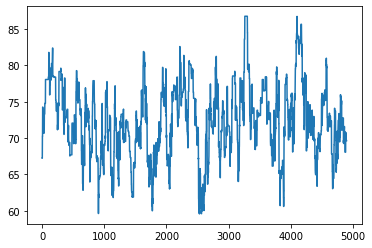

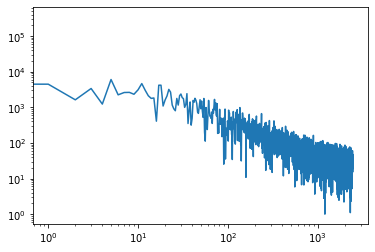

Parameter 1


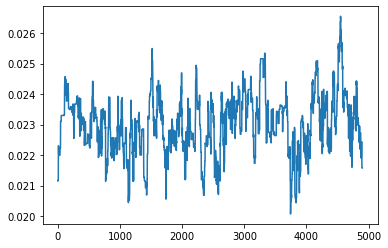

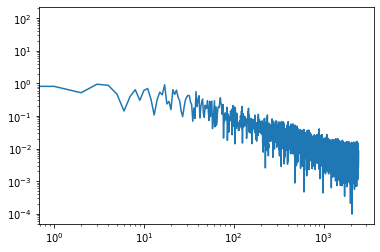

Parameter 2


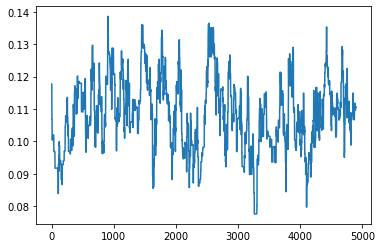

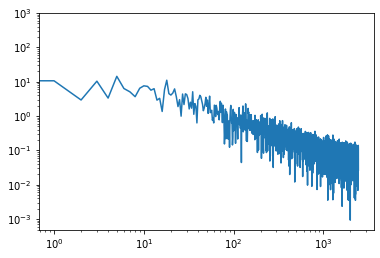

Parameter 3


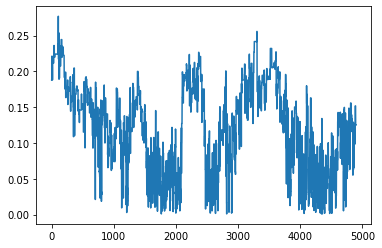

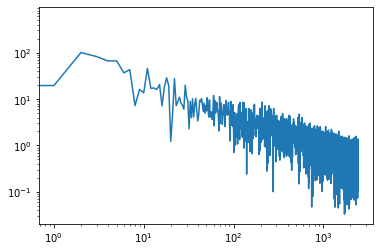

Parameter 4


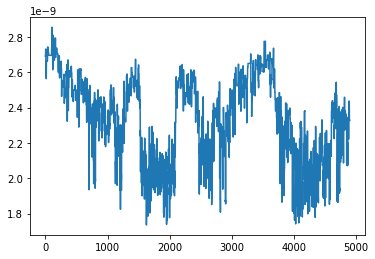

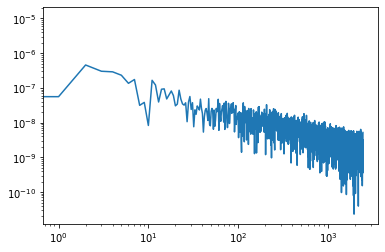

Parameter 5


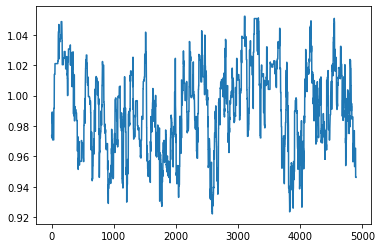

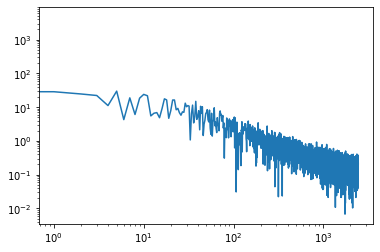

In [447]:
# Parameters evolution
burn_in = 100

print_chain(chain)


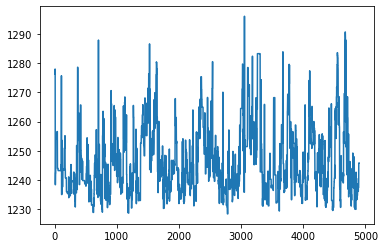

In [435]:
# Chi square evolution
plt.plot(chivec[burn_in:])
plt.show()

From the Fourier transforms, it seems the parameters haven't really converged, so let's add another 5000 samples.

In [388]:
# Start with last parameters
pars = chain[-1,:].copy()

# Run MCMC again
chain2, chivec2 = run_mcmc(pars, data, sample_mat, our_chisq, scale = 0.2, T = 4, nstep = 5000)

Parameter 0


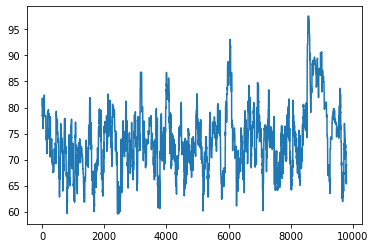

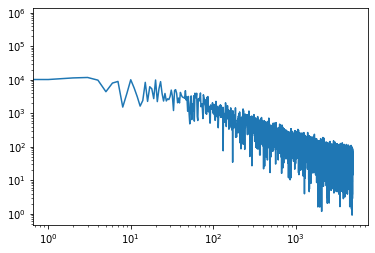

Parameter 1


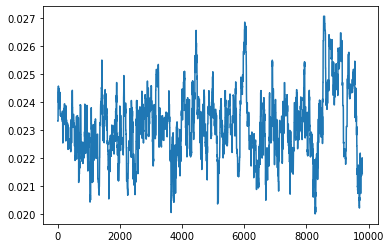

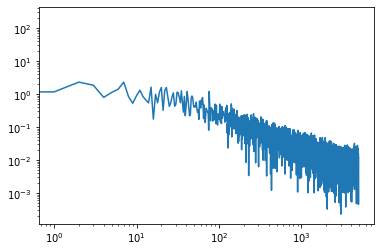

Parameter 2


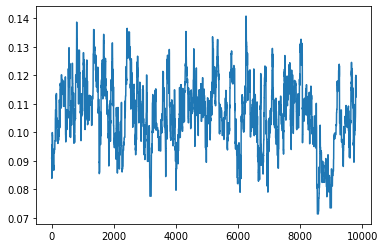

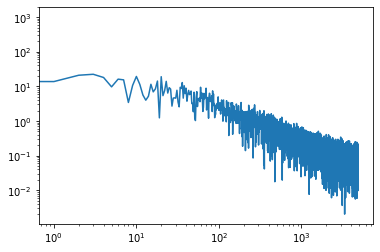

Parameter 3


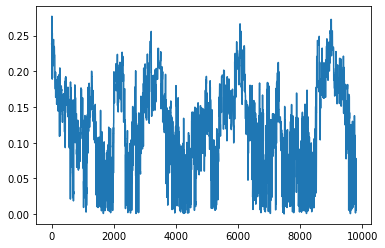

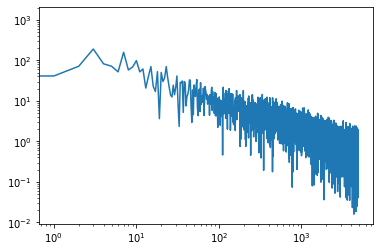

Parameter 4


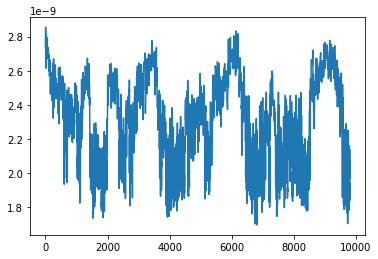

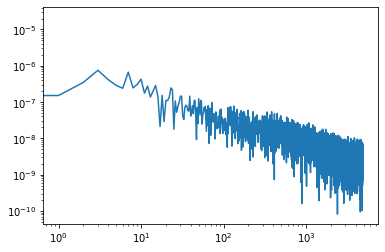

Parameter 5


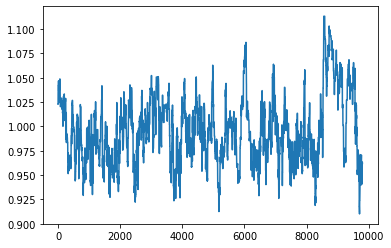

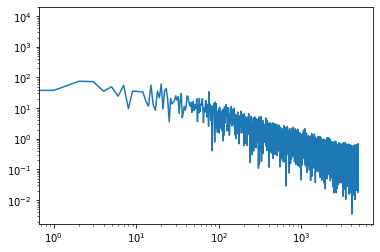

In [446]:
cat_chain = np.concatenate([chain, chain2])[burn_in:,:]
cat_chivec = np.concatenate([chivec, chivec2])[burn_in:]

print_chain(cat_chain)


Visually, we don't notice a big difference ... since simulating 5000 samples takes ~ 8 hours, we'll stop here.

### 5)
We now rerun MCMC while limiting the values of $\tau$. That is, we'll let $\tau \in [\overline{\tau} - 3\sigma_\tau, \overline{\tau} + 3 \sigma_\tau]$. We'll also only run for 5000 samples since it takes a long time.

In [408]:
def run_mcmc_with_tau_prior(pars, data, sample_mat, chifun, tau_prior_range, scale=1.0, T=1.0, nstep=5000):
    npar = len(pars)
    chain = np.zeros([nstep,npar])
    chivec = np.zeros(nstep)
    
    tau_min, tau_max = tau_prior_range
    
    chi_cur = chifun(data,pars)
    chi_trial = 0
    for i in range(nstep):
        pars_trial = pars + np.dot(sample_mat, np.random.randn(sample_mat.shape[0]))
        
        if pars_trial[3] < tau_min or pars_trial[3] > tau_max:
            while pars_trial[3] < tau_min or pars_trial[3] > tau_max:
                # If tau is outside 3 times its standard deviation, reject and retry step
                try:
                    pars_trial = pars + np.dot(sample_mat, np.random.randn(sample_mat.shape[0])) * scale
                    chi_trial = chifun(data, pars_trial)
                except:
                    # Error with parameters, retry
                    continue
        else:
            chi_trial = chifun(data, pars_trial)
            
        #print("Trying following parameters ::", pars_trial)
        #print("Chisq ::", chi_trial)
            
        #we now have chi^2 at our current location
        #and chi^2 in our trial location. decide if we take the step
        accept_prob = np.exp(-0.5 * (chi_trial - chi_cur) / T)
        if np.random.rand(1) < accept_prob: #accept the step with appropriate probability
            #print("\tGood! Taking step.")
            pars = pars_trial
            chi_cur = chi_trial
        chain[i,:] = pars
        chivec[i] = chi_cur
        
    return chain, chivec

In [409]:
# Start with initial parameters
pars = initial_pars.copy()
data = [wmap[:,0], wmap[:,1], wmap[:,2]] # x, y, noise

# Tau prior
tau_mean = 0.0544
tau_err = 0.0073

tau_min = tau_mean - 3 * tau_err
tau_max = tau_mean + 3 * tau_err

# Run MCMC
chain_tau, chivec_tau = run_mcmc_with_tau_prior(pars, data, sample_mat, our_chisq, [tau_min, tau_max], T = 4.0, nstep = 5000)

Parameter 0


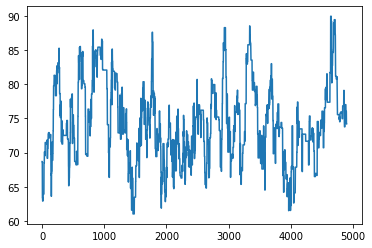

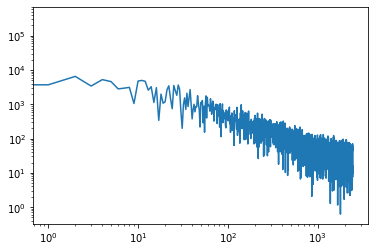

Parameter 1


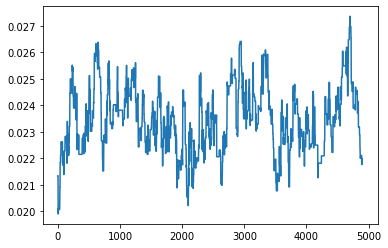

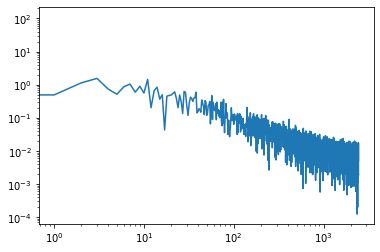

Parameter 2


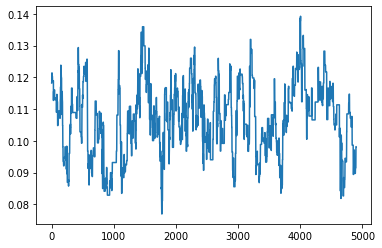

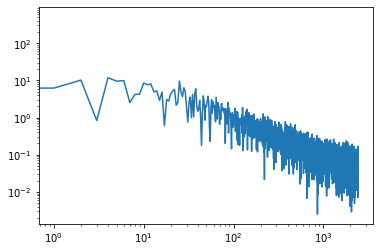

Parameter 3


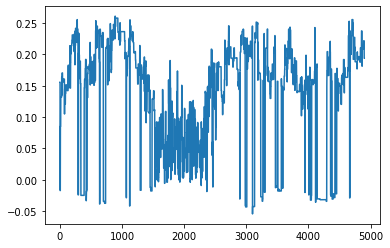

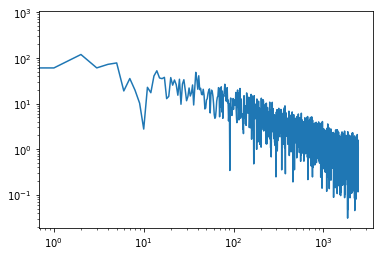

Parameter 4


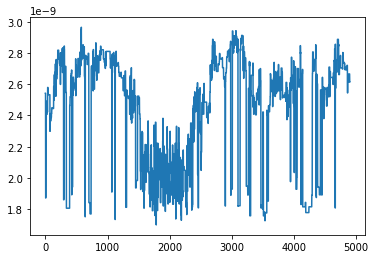

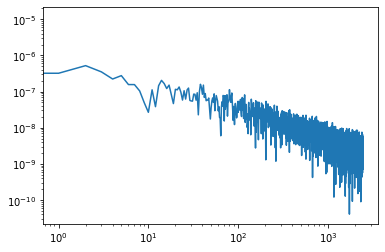

Parameter 5


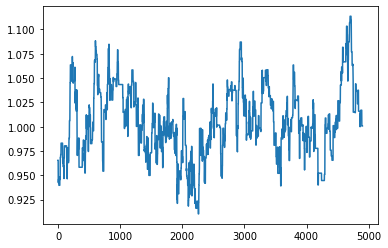

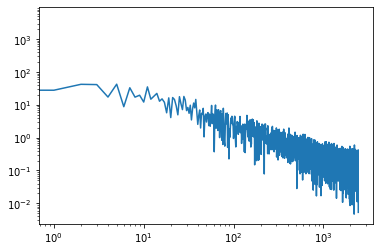

In [445]:
print_chain(chain_tau)


Let's look at the stats for all three runs.

#### First chain, 5,000 samples

In [450]:
get_stats(chain, chivec, T=4);

Means :: [7.20985833e+01 2.30372243e-02 1.09186393e-01 1.17178197e-01
 2.32204036e-09 9.89971280e-01]
Errors :: [3.04224703e+00 5.29832974e-04 6.23386015e-03 5.45136895e-02
 2.25615128e-10 1.91300959e-02]


#### Second chain, 10,000 samples

In [451]:
get_stats(cat_chain, cat_chivec, T=4);

Means :: [7.20563625e+01 2.30577574e-02 1.09553378e-01 1.12802388e-01
 2.30521455e-09 9.88963845e-01]
Errors :: [2.90740974e+00 5.83555210e-04 5.95951378e-03 5.29518327e-02
 2.20635370e-10 1.81479917e-02]


#### Third chain, with $\tau$, 5,000 samples

In [452]:
get_stats(chain_tau, chivec_tau, T=4);

Means :: [7.39219956e+01 2.33272417e-02 1.06893807e-01 1.41045705e-01
 2.45640380e-09 1.00214777e+00]
Errors :: [3.36802163e+00 7.43135003e-04 6.76378522e-03 8.27120587e-02
 3.25792892e-10 2.29686862e-02]


Results are roughly similar, although having different constraints for $\tau$ in the third chain results in bigger differences. Nonetheless, it seems that we'd need to run the chains for much longer to see convergence and have better confidence in the values we find. 